##### Name: Md Taskin Hossain

Import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier

C:\Users\User\Anaconda3\lib\site-packages\requests\__init__.py:91: RequestsDependencyWarning: urllib3 (1.26.8) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


In [2]:
data = pd.read_csv("magic04.data", header=None)
#for class - g-gamma, h-hadron
data = data.set_axis(['fLength', 'fWidth',  'fSize', 'fConc', 'fConc1', 'fAsym', 'fM3Long', 'fM3Trans', 'fAlpha', 'fDist', 
                     'class'], axis=1)
data

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g
...,...,...,...,...,...,...,...,...,...,...,...
19015,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,h
19016,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560,h
19017,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166,h
19018,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166,h


In [3]:
data.dtypes

fLength     float64
fWidth      float64
fSize       float64
fConc       float64
fConc1      float64
fAsym       float64
fM3Long     float64
fM3Trans    float64
fAlpha      float64
fDist       float64
class        object
dtype: object

In [4]:
data.nunique()

fLength     18643
fWidth      18200
fSize        7228
fConc        6410
fConc1       4421
fAsym       18704
fM3Long     18693
fM3Trans    18390
fAlpha      17981
fDist       18437
class           2
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19020 entries, 0 to 19019
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   fLength   19020 non-null  float64
 1   fWidth    19020 non-null  float64
 2   fSize     19020 non-null  float64
 3   fConc     19020 non-null  float64
 4   fConc1    19020 non-null  float64
 5   fAsym     19020 non-null  float64
 6   fM3Long   19020 non-null  float64
 7   fM3Trans  19020 non-null  float64
 8   fAlpha    19020 non-null  float64
 9   fDist     19020 non-null  float64
 10  class     19020 non-null  object 
dtypes: float64(10), object(1)
memory usage: 1.6+ MB


In [6]:
data.describe()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist
count,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000
mean,53.250154,22.180966,2.825017,0.380327,0.214657,-4.331745,10.545545,0.249726,27.645707,193.818026
std,42.364855,18.346056,0.472599,0.182813,0.110511,59.206062,51.000118,20.827439,26.103621,74.731787
min,4.283500,0.000000,1.941300,0.013100,0.000300,-457.916100,-331.780000,-205.894700,0.000000,1.282600
25%,24.336000,11.863800,2.477100,0.235800,0.128475,-20.586550,-12.842775,-10.849375,5.547925,142.492250
50%,37.147700,17.139900,2.739600,0.354150,0.196500,4.013050,15.314100,0.666200,17.679500,191.851450
75%,70.122175,24.739475,3.101600,0.503700,0.285225,24.063700,35.837800,10.946425,45.883550,240.563825
max,334.177000,256.382000,5.323300,0.893000,0.675200,575.240700,238.321000,179.851000,90.000000,495.561000


### Seperate columns into target and features

In [3]:
target = ['class']
features = []
for i in data.columns:
    if i not in target:
        features.append(i)
print("Target: ", target)
print()
print("Features: ", features)

Target:  ['class']

Features:  ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 'fM3Long', 'fM3Trans', 'fAlpha', 'fDist']


### Visualize distribution of each feature

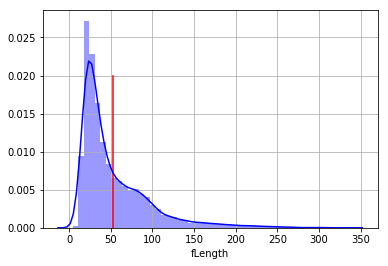

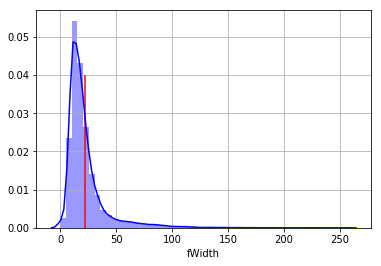

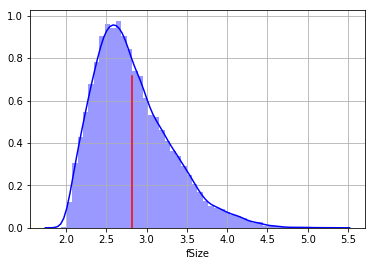

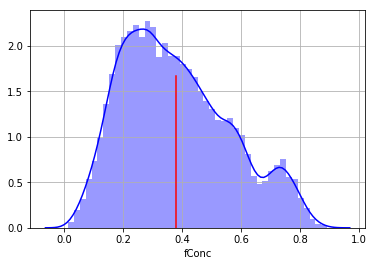

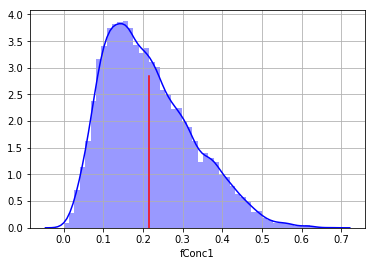

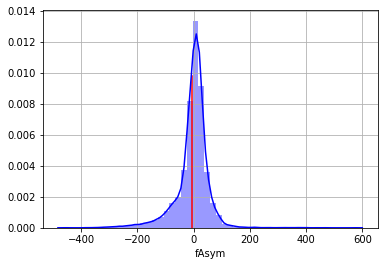

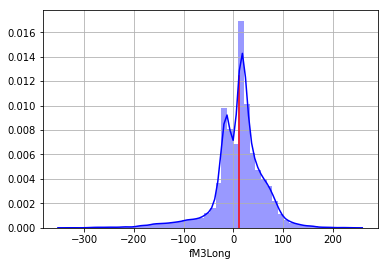

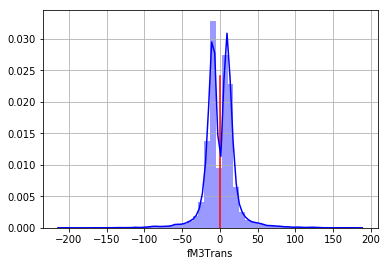

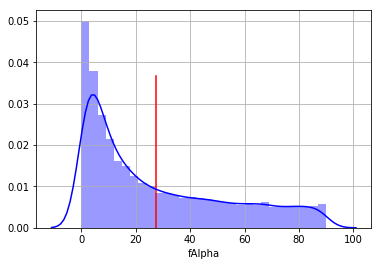

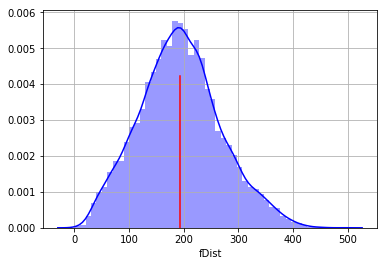

In [4]:
for i,col in enumerate(features):
    plt.figure(i)
    plt.axvline(data[col].mean(), 0,0.7, color = 'red')
    plt.grid()
    sns.distplot(data[col], color='blue')

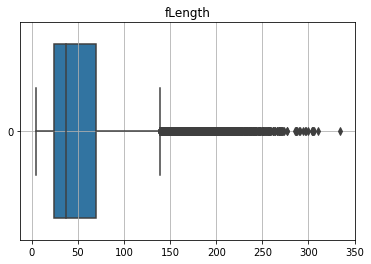

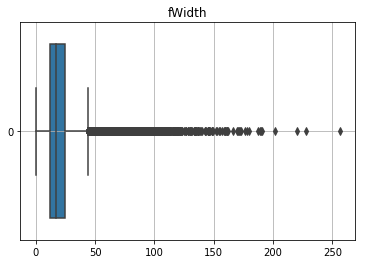

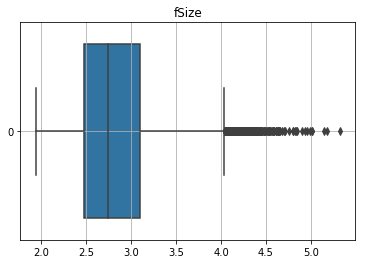

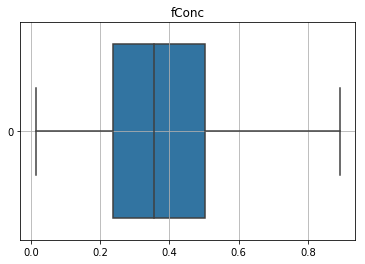

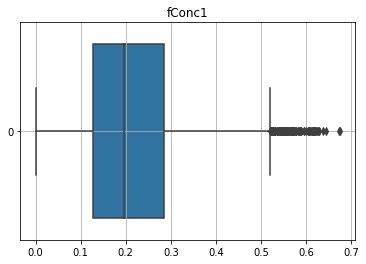

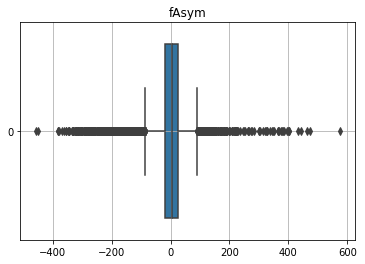

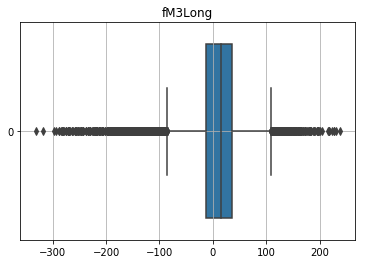

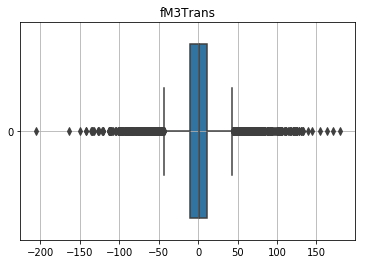

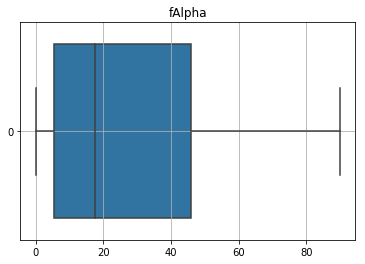

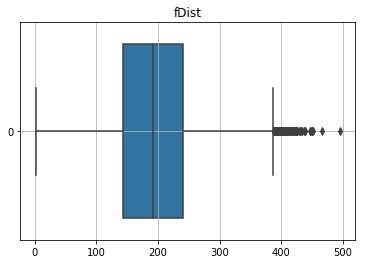

In [9]:
for i, col in enumerate(features):
    plt.figure(i)
    plt.title(col)
    sns.boxplot(data=data[col], orient='horizontal')
    plt.grid()

### Label encode the target column 'class'

In [5]:
# 0 represents g and 1 represents h
le = LabelEncoder()
data['class'] = le.fit_transform(data['class'])
data

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,0
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,0
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,0
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,0
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,0
...,...,...,...,...,...,...,...,...,...,...,...
19015,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,1
19016,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560,1
19017,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166,1
19018,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166,1


In [6]:
X = data[features].values
y = data.iloc[:,10].values
print(X.shape, y.shape)

(19020, 10) (19020,)


### Split into training and test data at 0.7 and 0.3 respectively

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 7)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(13314, 10) (5706, 10) (13314,) (5706,)


### Initial run of ANN

In [11]:
#set nodes to 6
classifier = Sequential()
classifier.add(Dense(6, activation = 'relu', input_dim = 10))
classifier.add(Dense(6, activation = 'relu'))
classifier.add(Dense(1, activation = 'sigmoid'))

In [12]:
classifier.compile(optimizer = 'sgd', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [13]:
hist = classifier.fit(X_train, y_train, epochs = 50, batch_size = 1000)

Epoch 1/50
14/14 [==============================] - 1s 8ms/step - loss: 1.3949 - accuracy: 0.6459
Epoch 2/50
14/14 [==============================] - 0s 4ms/step - loss: 0.6661 - accuracy: 0.6947
Epoch 3/50
14/14 [==============================] - 0s 4ms/step - loss: 0.6854 - accuracy: 0.6450
Epoch 4/50
14/14 [==============================] - 0s 5ms/step - loss: 0.6354 - accuracy: 0.7020
Epoch 5/50
14/14 [==============================] - 0s 7ms/step - loss: 0.6231 - accuracy: 0.7007
Epoch 6/50
14/14 [==============================] - 0s 4ms/step - loss: 0.6286 - accuracy: 0.6956
Epoch 7/50
14/14 [==============================] - 0s 3ms/step - loss: 0.6157 - accuracy: 0.7029
Epoch 8/50
14/14 [==============================] - 0s 5ms/step - loss: 0.6070 - accuracy: 0.7060
Epoch 9/50
14/14 [==============================] - 0s 4ms/step - loss: 0.6214 - accuracy: 0.6912
Epoch 10/50
14/14 [==============================] - 0s 4ms/step - loss: 0.5964 - accuracy: 0.7082
Epoch 11/50
14/14 [

### Accuracy of 0.760 achieved with loss of 0.502 without tuning of hyperparameters

In [14]:
print('Loss of model: ', classifier.evaluate(X_test, y_test)[0])
print('Accuracy of model: ', classifier.evaluate(X_test, y_test)[1])

179/179 [==============================] - 0s 1ms/step - loss: 0.5023 - accuracy: 0.7601
Loss of model:  0.5023243427276611
179/179 [==============================] - 0s 1ms/step - loss: 0.5023 - accuracy: 0.7601
Accuracy of model:  0.7600771188735962


### Visualization of Accuracy and Loss of ANN training

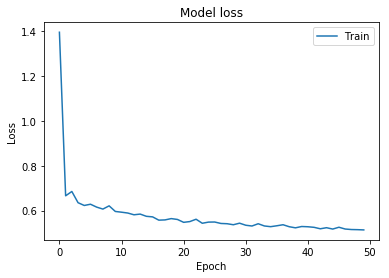

In [15]:
plt.plot(hist.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper right')
plt.show()

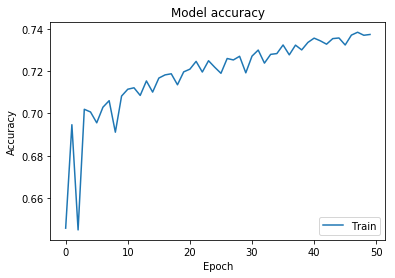

In [16]:
plt.plot(hist.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='lower right')
plt.show()

### Neural Network Hyperparameter tuning

In [8]:
input_dim = X_train.shape[1]
num_classes = 10

#for epoch and batch size
def create_model(optimizer = 'sgd'):
    model = Sequential()
    model.add(Dense(6, input_dim = input_dim, activation = 'relu'))
    model.add(Dense(6, activation = 'relu'))
    model.add(Dense(1, activation = 'sigmoid'))
    
    model.compile(loss = 'binary_crossentropy',
                 optimizer = optimizer,
                 metrics = ['accuracy'])
    
    return model

In [23]:
#tuning epochs and batch size
np.random.seed(7)
model_init = KerasClassifier(build_fn = create_model, verbose = 1)

param_grid = {
    "epochs" : [600, 800, 1000],
    "batch_size" : [750, 1000]
}

grid = GridSearchCV(estimator = model_init, param_grid = param_grid, cv=3)

result = grid.fit(X_train, y_train)

Epoch 1/600


C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  This is separate from the ipykernel package so we can avoid doing imports until


12/12 [==============================] - 1s 5ms/step - loss: 4.5589 - accuracy: 0.5941
Epoch 2/600
12/12 [==============================] - 0s 3ms/step - loss: 0.6405 - accuracy: 0.6673
Epoch 3/600
12/12 [==============================] - 0s 2ms/step - loss: 0.6193 - accuracy: 0.6867
Epoch 4/600
12/12 [==============================] - 0s 3ms/step - loss: 0.6142 - accuracy: 0.6913
Epoch 5/600
12/12 [==============================] - 0s 6ms/step - loss: 0.6097 - accuracy: 0.6965
Epoch 6/600
12/12 [==============================] - 0s 5ms/step - loss: 0.6080 - accuracy: 0.6934
Epoch 7/600
12/12 [==============================] - 0s 4ms/step - loss: 0.6028 - accuracy: 0.6985
Epoch 8/600
12/12 [==============================] - 0s 5ms/step - loss: 0.6035 - accuracy: 0.6907
Epoch 9/600
12/12 [==============================] - 0s 6ms/step - loss: 0.5952 - accuracy: 0.7048
Epoch 10/600
12/12 [==============================] - 0s 4ms/step - loss: 0.5892 - accuracy: 0.7056
Epoch 11/600
12/12 [=

12/12 [==============================] - 0s 2ms/step - loss: 0.4893 - accuracy: 0.7619
Epoch 165/600
12/12 [==============================] - 0s 2ms/step - loss: 0.4924 - accuracy: 0.7606
Epoch 166/600
12/12 [==============================] - 0s 2ms/step - loss: 0.4879 - accuracy: 0.7625
Epoch 167/600
12/12 [==============================] - 0s 2ms/step - loss: 0.4890 - accuracy: 0.7586
Epoch 168/600
12/12 [==============================] - 0s 2ms/step - loss: 0.4937 - accuracy: 0.7617
Epoch 169/600
12/12 [==============================] - 0s 2ms/step - loss: 0.4902 - accuracy: 0.7630
Epoch 170/600
12/12 [==============================] - 0s 2ms/step - loss: 0.4897 - accuracy: 0.7619
Epoch 171/600
12/12 [==============================] - 0s 2ms/step - loss: 0.4883 - accuracy: 0.7640
Epoch 172/600
12/12 [==============================] - 0s 2ms/step - loss: 0.4864 - accuracy: 0.7637
Epoch 173/600
12/12 [==============================] - 0s 2ms/step - loss: 0.4877 - accuracy: 0.7603
Epoc

12/12 [==============================] - 0s 2ms/step - loss: 0.4569 - accuracy: 0.7912
Epoch 327/600
12/12 [==============================] - 0s 2ms/step - loss: 0.4558 - accuracy: 0.7933
Epoch 328/600
12/12 [==============================] - 0s 2ms/step - loss: 0.4563 - accuracy: 0.7919
Epoch 329/600
12/12 [==============================] - 0s 2ms/step - loss: 0.4561 - accuracy: 0.7930
Epoch 330/600
12/12 [==============================] - 0s 2ms/step - loss: 0.4579 - accuracy: 0.7909
Epoch 331/600
12/12 [==============================] - 0s 2ms/step - loss: 0.4558 - accuracy: 0.7946
Epoch 332/600
12/12 [==============================] - 0s 2ms/step - loss: 0.4566 - accuracy: 0.7929
Epoch 333/600
12/12 [==============================] - 0s 2ms/step - loss: 0.4550 - accuracy: 0.7920
Epoch 334/600
12/12 [==============================] - 0s 2ms/step - loss: 0.4554 - accuracy: 0.7929
Epoch 335/600
12/12 [==============================] - 0s 2ms/step - loss: 0.4555 - accuracy: 0.7937
Epoc

12/12 [==============================] - 0s 2ms/step - loss: 0.4334 - accuracy: 0.8130
Epoch 489/600
12/12 [==============================] - 0s 3ms/step - loss: 0.4328 - accuracy: 0.8121
Epoch 490/600
12/12 [==============================] - 0s 2ms/step - loss: 0.4338 - accuracy: 0.8126
Epoch 491/600
12/12 [==============================] - 0s 2ms/step - loss: 0.4344 - accuracy: 0.8110
Epoch 492/600
12/12 [==============================] - 0s 2ms/step - loss: 0.4323 - accuracy: 0.8140
Epoch 493/600
12/12 [==============================] - 0s 2ms/step - loss: 0.4327 - accuracy: 0.8158
Epoch 494/600
12/12 [==============================] - 0s 2ms/step - loss: 0.4321 - accuracy: 0.8124
Epoch 495/600
12/12 [==============================] - 0s 2ms/step - loss: 0.4317 - accuracy: 0.8130
Epoch 496/600
12/12 [==============================] - 0s 3ms/step - loss: 0.4320 - accuracy: 0.8137
Epoch 497/600
12/12 [==============================] - 0s 2ms/step - loss: 0.4331 - accuracy: 0.8134
Epoc

Epoch 50/600
12/12 [==============================] - 0s 2ms/step - loss: 0.6424 - accuracy: 0.6581
Epoch 51/600
12/12 [==============================] - 0s 2ms/step - loss: 0.6422 - accuracy: 0.6582
Epoch 52/600
12/12 [==============================] - 0s 2ms/step - loss: 0.6420 - accuracy: 0.6582
Epoch 53/600
12/12 [==============================] - 0s 2ms/step - loss: 0.6418 - accuracy: 0.6582
Epoch 54/600
12/12 [==============================] - 0s 2ms/step - loss: 0.6417 - accuracy: 0.6582
Epoch 55/600
12/12 [==============================] - 0s 2ms/step - loss: 0.6415 - accuracy: 0.6582
Epoch 56/600
12/12 [==============================] - 0s 2ms/step - loss: 0.6414 - accuracy: 0.6582
Epoch 57/600
12/12 [==============================] - 0s 2ms/step - loss: 0.6412 - accuracy: 0.6581
Epoch 58/600
12/12 [==============================] - 0s 2ms/step - loss: 0.6411 - accuracy: 0.6583
Epoch 59/600
12/12 [==============================] - 0s 2ms/step - loss: 0.6409 - accuracy: 0.6581


12/12 [==============================] - 0s 2ms/step - loss: 0.6361 - accuracy: 0.6605
Epoch 213/600
12/12 [==============================] - 0s 2ms/step - loss: 0.6361 - accuracy: 0.6605
Epoch 214/600
12/12 [==============================] - 0s 2ms/step - loss: 0.6361 - accuracy: 0.6604
Epoch 215/600
12/12 [==============================] - 0s 2ms/step - loss: 0.6361 - accuracy: 0.6604
Epoch 216/600
12/12 [==============================] - 0s 2ms/step - loss: 0.6361 - accuracy: 0.6605
Epoch 217/600
12/12 [==============================] - 0s 2ms/step - loss: 0.6360 - accuracy: 0.6605
Epoch 218/600
12/12 [==============================] - 0s 2ms/step - loss: 0.6358 - accuracy: 0.6608
Epoch 219/600
12/12 [==============================] - 0s 2ms/step - loss: 0.6358 - accuracy: 0.6609
Epoch 220/600
12/12 [==============================] - 0s 2ms/step - loss: 0.6358 - accuracy: 0.6610
Epoch 221/600
12/12 [==============================] - 0s 2ms/step - loss: 0.6358 - accuracy: 0.6609
Epoc

12/12 [==============================] - 0s 2ms/step - loss: 0.5913 - accuracy: 0.7055
Epoch 375/600
12/12 [==============================] - 0s 2ms/step - loss: 0.5908 - accuracy: 0.7034
Epoch 376/600
12/12 [==============================] - 0s 2ms/step - loss: 0.5901 - accuracy: 0.7058
Epoch 377/600
12/12 [==============================] - 0s 2ms/step - loss: 0.5896 - accuracy: 0.7065
Epoch 378/600
12/12 [==============================] - 0s 2ms/step - loss: 0.5886 - accuracy: 0.7046
Epoch 379/600
12/12 [==============================] - 0s 2ms/step - loss: 0.5886 - accuracy: 0.7055
Epoch 380/600
12/12 [==============================] - 0s 2ms/step - loss: 0.5880 - accuracy: 0.7067
Epoch 381/600
12/12 [==============================] - 0s 2ms/step - loss: 0.5878 - accuracy: 0.7062
Epoch 382/600
12/12 [==============================] - 0s 2ms/step - loss: 0.5874 - accuracy: 0.7048
Epoch 383/600
12/12 [==============================] - 0s 2ms/step - loss: 0.5869 - accuracy: 0.7070
Epoc

12/12 [==============================] - 0s 2ms/step - loss: 0.5050 - accuracy: 0.7636
Epoch 537/600
12/12 [==============================] - 0s 2ms/step - loss: 0.5119 - accuracy: 0.7578
Epoch 538/600
12/12 [==============================] - 0s 2ms/step - loss: 0.5090 - accuracy: 0.7599
Epoch 539/600
12/12 [==============================] - 0s 2ms/step - loss: 0.5021 - accuracy: 0.7666
Epoch 540/600
12/12 [==============================] - 0s 2ms/step - loss: 0.5210 - accuracy: 0.7561
Epoch 541/600
12/12 [==============================] - 0s 2ms/step - loss: 0.4926 - accuracy: 0.7766
Epoch 542/600
12/12 [==============================] - 0s 2ms/step - loss: 0.5012 - accuracy: 0.7662
Epoch 543/600
12/12 [==============================] - 0s 2ms/step - loss: 0.4960 - accuracy: 0.7730
Epoch 544/600
12/12 [==============================] - 0s 2ms/step - loss: 0.5090 - accuracy: 0.7588
Epoch 545/600
12/12 [==============================] - 0s 2ms/step - loss: 0.4890 - accuracy: 0.7808
Epoc

12/12 [==============================] - 0s 2ms/step - loss: 0.5471 - accuracy: 0.7181
Epoch 99/600
12/12 [==============================] - 0s 2ms/step - loss: 0.5467 - accuracy: 0.7133
Epoch 100/600
12/12 [==============================] - 0s 2ms/step - loss: 0.5470 - accuracy: 0.7128
Epoch 101/600
12/12 [==============================] - 0s 2ms/step - loss: 0.5480 - accuracy: 0.7188
Epoch 102/600
12/12 [==============================] - 0s 2ms/step - loss: 0.5463 - accuracy: 0.7169
Epoch 103/600
12/12 [==============================] - 0s 2ms/step - loss: 0.5459 - accuracy: 0.7128
Epoch 104/600
12/12 [==============================] - 0s 2ms/step - loss: 0.5460 - accuracy: 0.7143
Epoch 105/600
12/12 [==============================] - 0s 2ms/step - loss: 0.5466 - accuracy: 0.7138
Epoch 106/600
12/12 [==============================] - 0s 2ms/step - loss: 0.5463 - accuracy: 0.7162
Epoch 107/600
12/12 [==============================] - 0s 2ms/step - loss: 0.5457 - accuracy: 0.7154
Epoch

12/12 [==============================] - 0s 2ms/step - loss: 0.5027 - accuracy: 0.7316
Epoch 261/600
12/12 [==============================] - 0s 2ms/step - loss: 0.5031 - accuracy: 0.7322
Epoch 262/600
12/12 [==============================] - 0s 2ms/step - loss: 0.5038 - accuracy: 0.7272
Epoch 263/600
12/12 [==============================] - 0s 2ms/step - loss: 0.5081 - accuracy: 0.7253
Epoch 264/600
12/12 [==============================] - 0s 2ms/step - loss: 0.5041 - accuracy: 0.7303
Epoch 265/600
12/12 [==============================] - 0s 2ms/step - loss: 0.5021 - accuracy: 0.7338
Epoch 266/600
12/12 [==============================] - 0s 2ms/step - loss: 0.4964 - accuracy: 0.7349
Epoch 267/600
12/12 [==============================] - 0s 2ms/step - loss: 0.5018 - accuracy: 0.7297
Epoch 268/600
12/12 [==============================] - 0s 2ms/step - loss: 0.5013 - accuracy: 0.7316
Epoch 269/600
12/12 [==============================] - 0s 2ms/step - loss: 0.4999 - accuracy: 0.7320
Epoc

12/12 [==============================] - 0s 2ms/step - loss: 0.4678 - accuracy: 0.7756
Epoch 423/600
12/12 [==============================] - 0s 2ms/step - loss: 0.4678 - accuracy: 0.7768
Epoch 424/600
12/12 [==============================] - 0s 2ms/step - loss: 0.4658 - accuracy: 0.7759
Epoch 425/600
12/12 [==============================] - 0s 2ms/step - loss: 0.4676 - accuracy: 0.7763
Epoch 426/600
12/12 [==============================] - 0s 2ms/step - loss: 0.4685 - accuracy: 0.7702
Epoch 427/600
12/12 [==============================] - 0s 2ms/step - loss: 0.4682 - accuracy: 0.7723
Epoch 428/600
12/12 [==============================] - 0s 2ms/step - loss: 0.4671 - accuracy: 0.7741
Epoch 429/600
12/12 [==============================] - 0s 2ms/step - loss: 0.4686 - accuracy: 0.7763
Epoch 430/600
12/12 [==============================] - 0s 2ms/step - loss: 0.4661 - accuracy: 0.7801
Epoch 431/600
12/12 [==============================] - 0s 2ms/step - loss: 0.4677 - accuracy: 0.7731
Epoc

12/12 [==============================] - 0s 2ms/step - loss: 0.4453 - accuracy: 0.8057
Epoch 585/600
12/12 [==============================] - 0s 2ms/step - loss: 0.4441 - accuracy: 0.8081
Epoch 586/600
12/12 [==============================] - 0s 2ms/step - loss: 0.4429 - accuracy: 0.8073
Epoch 587/600
12/12 [==============================] - 0s 2ms/step - loss: 0.4428 - accuracy: 0.8093
Epoch 588/600
12/12 [==============================] - 0s 2ms/step - loss: 0.4430 - accuracy: 0.8073
Epoch 589/600
12/12 [==============================] - 0s 2ms/step - loss: 0.4426 - accuracy: 0.8082
Epoch 590/600
12/12 [==============================] - 0s 2ms/step - loss: 0.4454 - accuracy: 0.8043
Epoch 591/600
12/12 [==============================] - 0s 2ms/step - loss: 0.4430 - accuracy: 0.8086
Epoch 592/600
12/12 [==============================] - 0s 2ms/step - loss: 0.4438 - accuracy: 0.8077
Epoch 593/600
12/12 [==============================] - 0s 2ms/step - loss: 0.4416 - accuracy: 0.8078
Epoc

12/12 [==============================] - 0s 2ms/step - loss: 0.5268 - accuracy: 0.7058
Epoch 147/800
12/12 [==============================] - 0s 2ms/step - loss: 0.5267 - accuracy: 0.7058
Epoch 148/800
12/12 [==============================] - 0s 2ms/step - loss: 0.5265 - accuracy: 0.7049
Epoch 149/800
12/12 [==============================] - 0s 2ms/step - loss: 0.5265 - accuracy: 0.7052
Epoch 150/800
12/12 [==============================] - 0s 2ms/step - loss: 0.5263 - accuracy: 0.7057
Epoch 151/800
12/12 [==============================] - 0s 2ms/step - loss: 0.5263 - accuracy: 0.7053
Epoch 152/800
12/12 [==============================] - 0s 2ms/step - loss: 0.5262 - accuracy: 0.7049
Epoch 153/800
12/12 [==============================] - 0s 2ms/step - loss: 0.5261 - accuracy: 0.7048
Epoch 154/800
12/12 [==============================] - 0s 2ms/step - loss: 0.5259 - accuracy: 0.7054
Epoch 155/800
12/12 [==============================] - 0s 2ms/step - loss: 0.5258 - accuracy: 0.7049
Epoc

12/12 [==============================] - 0s 2ms/step - loss: 0.5066 - accuracy: 0.7330
Epoch 309/800
12/12 [==============================] - 0s 2ms/step - loss: 0.5060 - accuracy: 0.7329
Epoch 310/800
12/12 [==============================] - 0s 2ms/step - loss: 0.5061 - accuracy: 0.7358
Epoch 311/800
12/12 [==============================] - 0s 2ms/step - loss: 0.5053 - accuracy: 0.7346
Epoch 312/800
12/12 [==============================] - 0s 2ms/step - loss: 0.5049 - accuracy: 0.7364
Epoch 313/800
12/12 [==============================] - 0s 2ms/step - loss: 0.5045 - accuracy: 0.7356
Epoch 314/800
12/12 [==============================] - 0s 2ms/step - loss: 0.5040 - accuracy: 0.7354
Epoch 315/800
12/12 [==============================] - 0s 2ms/step - loss: 0.5038 - accuracy: 0.7372
Epoch 316/800
12/12 [==============================] - 0s 2ms/step - loss: 0.5033 - accuracy: 0.7406
Epoch 317/800
12/12 [==============================] - 0s 2ms/step - loss: 0.5028 - accuracy: 0.7392
Epoc

12/12 [==============================] - 0s 3ms/step - loss: 0.4650 - accuracy: 0.7818
Epoch 471/800
12/12 [==============================] - 0s 2ms/step - loss: 0.4653 - accuracy: 0.7838
Epoch 472/800
12/12 [==============================] - 0s 2ms/step - loss: 0.4649 - accuracy: 0.7829
Epoch 473/800
12/12 [==============================] - 0s 2ms/step - loss: 0.4647 - accuracy: 0.7820
Epoch 474/800
12/12 [==============================] - 0s 2ms/step - loss: 0.4650 - accuracy: 0.7817
Epoch 475/800
12/12 [==============================] - 0s 2ms/step - loss: 0.4651 - accuracy: 0.7844
Epoch 476/800
12/12 [==============================] - 0s 2ms/step - loss: 0.4645 - accuracy: 0.7841
Epoch 477/800
12/12 [==============================] - 0s 2ms/step - loss: 0.4645 - accuracy: 0.7854
Epoch 478/800
12/12 [==============================] - 0s 2ms/step - loss: 0.4645 - accuracy: 0.7845
Epoch 479/800
12/12 [==============================] - 0s 2ms/step - loss: 0.4641 - accuracy: 0.7852
Epoc

12/12 [==============================] - 0s 2ms/step - loss: 0.4470 - accuracy: 0.8052
Epoch 633/800
12/12 [==============================] - 0s 2ms/step - loss: 0.4472 - accuracy: 0.8063
Epoch 634/800
12/12 [==============================] - 0s 2ms/step - loss: 0.4480 - accuracy: 0.8034
Epoch 635/800
12/12 [==============================] - 0s 2ms/step - loss: 0.4473 - accuracy: 0.8051
Epoch 636/800
12/12 [==============================] - 0s 2ms/step - loss: 0.4477 - accuracy: 0.8028
Epoch 637/800
12/12 [==============================] - 0s 3ms/step - loss: 0.4475 - accuracy: 0.8049
Epoch 638/800
12/12 [==============================] - 0s 6ms/step - loss: 0.4494 - accuracy: 0.8030
Epoch 639/800
12/12 [==============================] - 0s 5ms/step - loss: 0.4477 - accuracy: 0.8057
Epoch 640/800
12/12 [==============================] - 0s 5ms/step - loss: 0.4500 - accuracy: 0.8014
Epoch 641/800
12/12 [==============================] - 0s 4ms/step - loss: 0.4482 - accuracy: 0.8036
Epoc

12/12 [==============================] - 0s 3ms/step - loss: 0.4320 - accuracy: 0.8157
Epoch 795/800
12/12 [==============================] - 0s 3ms/step - loss: 0.4320 - accuracy: 0.8164
Epoch 796/800
12/12 [==============================] - 0s 2ms/step - loss: 0.4327 - accuracy: 0.8183
Epoch 797/800
12/12 [==============================] - 0s 2ms/step - loss: 0.4348 - accuracy: 0.8164
Epoch 798/800
12/12 [==============================] - 0s 2ms/step - loss: 0.4325 - accuracy: 0.8162
Epoch 799/800
12/12 [==============================] - 0s 2ms/step - loss: 0.4313 - accuracy: 0.8174
Epoch 800/800
6/6 [==============================] - 0s 2ms/step - loss: 0.4326 - accuracy: 0.8130
Epoch 1/800
12/12 [==============================] - 0s 2ms/step - loss: 1.6068 - accuracy: 0.5421
Epoch 2/800
12/12 [==============================] - 0s 2ms/step - loss: 0.6729 - accuracy: 0.6746
Epoch 3/800
12/12 [==============================] - 0s 2ms/step - loss: 0.6388 - accuracy: 0.7028
Epoch 4/800


12/12 [==============================] - 0s 3ms/step - loss: 0.4847 - accuracy: 0.7646
Epoch 157/800
12/12 [==============================] - 0s 3ms/step - loss: 0.4883 - accuracy: 0.7669
Epoch 158/800
12/12 [==============================] - 0s 3ms/step - loss: 0.4858 - accuracy: 0.7660
Epoch 159/800
12/12 [==============================] - 0s 2ms/step - loss: 0.4845 - accuracy: 0.7664
Epoch 160/800
12/12 [==============================] - 0s 2ms/step - loss: 0.4842 - accuracy: 0.7666
Epoch 161/800
12/12 [==============================] - 0s 2ms/step - loss: 0.4840 - accuracy: 0.7669
Epoch 162/800
12/12 [==============================] - 0s 2ms/step - loss: 0.4834 - accuracy: 0.7676
Epoch 163/800
12/12 [==============================] - 0s 2ms/step - loss: 0.4835 - accuracy: 0.7663
Epoch 164/800
12/12 [==============================] - 0s 2ms/step - loss: 0.4836 - accuracy: 0.7662
Epoch 165/800
12/12 [==============================] - 0s 2ms/step - loss: 0.4832 - accuracy: 0.7683
Epoc

12/12 [==============================] - 0s 2ms/step - loss: 0.4483 - accuracy: 0.8097
Epoch 319/800
12/12 [==============================] - 0s 2ms/step - loss: 0.4488 - accuracy: 0.8070
Epoch 320/800
12/12 [==============================] - 0s 2ms/step - loss: 0.4484 - accuracy: 0.8066
Epoch 321/800
12/12 [==============================] - 0s 2ms/step - loss: 0.4485 - accuracy: 0.8099
Epoch 322/800
12/12 [==============================] - 0s 2ms/step - loss: 0.4479 - accuracy: 0.8091
Epoch 323/800
12/12 [==============================] - 0s 2ms/step - loss: 0.4470 - accuracy: 0.8111
Epoch 324/800
12/12 [==============================] - 0s 2ms/step - loss: 0.4470 - accuracy: 0.8088
Epoch 325/800
12/12 [==============================] - 0s 2ms/step - loss: 0.4469 - accuracy: 0.8112
Epoch 326/800
12/12 [==============================] - 0s 2ms/step - loss: 0.4478 - accuracy: 0.8096
Epoch 327/800
12/12 [==============================] - 0s 2ms/step - loss: 0.4467 - accuracy: 0.8102
Epoc

12/12 [==============================] - 0s 2ms/step - loss: 0.4347 - accuracy: 0.8155
Epoch 481/800
12/12 [==============================] - 0s 2ms/step - loss: 0.4327 - accuracy: 0.8174
Epoch 482/800
12/12 [==============================] - 0s 2ms/step - loss: 0.4336 - accuracy: 0.8156
Epoch 483/800
12/12 [==============================] - 0s 2ms/step - loss: 0.4325 - accuracy: 0.8166
Epoch 484/800
12/12 [==============================] - 0s 4ms/step - loss: 0.4329 - accuracy: 0.8169
Epoch 485/800
12/12 [==============================] - 0s 3ms/step - loss: 0.4346 - accuracy: 0.8150
Epoch 486/800
12/12 [==============================] - 0s 3ms/step - loss: 0.4327 - accuracy: 0.8166
Epoch 487/800
12/12 [==============================] - 0s 2ms/step - loss: 0.4321 - accuracy: 0.8158
Epoch 488/800
12/12 [==============================] - 0s 3ms/step - loss: 0.4327 - accuracy: 0.8162
Epoch 489/800
12/12 [==============================] - 0s 2ms/step - loss: 0.4326 - accuracy: 0.8169
Epoc

12/12 [==============================] - 0s 2ms/step - loss: 0.4247 - accuracy: 0.8194
Epoch 643/800
12/12 [==============================] - 0s 2ms/step - loss: 0.4237 - accuracy: 0.8215
Epoch 644/800
12/12 [==============================] - 0s 2ms/step - loss: 0.4239 - accuracy: 0.8197
Epoch 645/800
12/12 [==============================] - 0s 2ms/step - loss: 0.4264 - accuracy: 0.8185
Epoch 646/800
12/12 [==============================] - 0s 2ms/step - loss: 0.4279 - accuracy: 0.8187
Epoch 647/800
12/12 [==============================] - 0s 2ms/step - loss: 0.4273 - accuracy: 0.8171
Epoch 648/800
12/12 [==============================] - 0s 2ms/step - loss: 0.4265 - accuracy: 0.8203
Epoch 649/800
12/12 [==============================] - 0s 2ms/step - loss: 0.4253 - accuracy: 0.8189
Epoch 650/800
12/12 [==============================] - 0s 2ms/step - loss: 0.4238 - accuracy: 0.8203
Epoch 651/800
12/12 [==============================] - 0s 2ms/step - loss: 0.4232 - accuracy: 0.8187
Epoc

12/12 [==============================] - 0s 4ms/step - loss: 0.6032 - accuracy: 0.7010
Epoch 4/800
12/12 [==============================] - 0s 2ms/step - loss: 0.5992 - accuracy: 0.7066
Epoch 5/800
12/12 [==============================] - 0s 2ms/step - loss: 0.5957 - accuracy: 0.7064
Epoch 6/800
12/12 [==============================] - 0s 4ms/step - loss: 0.5987 - accuracy: 0.7046
Epoch 7/800
12/12 [==============================] - 0s 2ms/step - loss: 0.5959 - accuracy: 0.7079
Epoch 8/800
12/12 [==============================] - 0s 2ms/step - loss: 0.5927 - accuracy: 0.7058
Epoch 9/800
12/12 [==============================] - 0s 2ms/step - loss: 0.5928 - accuracy: 0.7076
Epoch 10/800
12/12 [==============================] - 0s 2ms/step - loss: 0.5952 - accuracy: 0.7047
Epoch 11/800
12/12 [==============================] - 0s 2ms/step - loss: 0.5906 - accuracy: 0.7089
Epoch 12/800
12/12 [==============================] - 0s 2ms/step - loss: 0.5881 - accuracy: 0.7084
Epoch 13/800
12/12 

12/12 [==============================] - 0s 2ms/step - loss: 0.5081 - accuracy: 0.7439
Epoch 86/800
12/12 [==============================] - 0s 2ms/step - loss: 0.5037 - accuracy: 0.7506
Epoch 87/800
12/12 [==============================] - 0s 2ms/step - loss: 0.5011 - accuracy: 0.7498
Epoch 88/800
12/12 [==============================] - 0s 2ms/step - loss: 0.5024 - accuracy: 0.7480
Epoch 89/800
12/12 [==============================] - 0s 2ms/step - loss: 0.5034 - accuracy: 0.7488
Epoch 90/800
12/12 [==============================] - 0s 2ms/step - loss: 0.5012 - accuracy: 0.7481
Epoch 91/800
12/12 [==============================] - 0s 2ms/step - loss: 0.5008 - accuracy: 0.7508
Epoch 92/800
12/12 [==============================] - 0s 2ms/step - loss: 0.5002 - accuracy: 0.7525
Epoch 93/800
12/12 [==============================] - 0s 2ms/step - loss: 0.5016 - accuracy: 0.7502
Epoch 94/800
12/12 [==============================] - 0s 2ms/step - loss: 0.4988 - accuracy: 0.7526
Epoch 95/800


12/12 [==============================] - 0s 2ms/step - loss: 0.4701 - accuracy: 0.7679
Epoch 248/800
12/12 [==============================] - 0s 5ms/step - loss: 0.4674 - accuracy: 0.7719
Epoch 249/800
12/12 [==============================] - 0s 3ms/step - loss: 0.4699 - accuracy: 0.7702
Epoch 250/800
12/12 [==============================] - 0s 2ms/step - loss: 0.4690 - accuracy: 0.7721
Epoch 251/800
12/12 [==============================] - 0s 2ms/step - loss: 0.4683 - accuracy: 0.7716
Epoch 252/800
12/12 [==============================] - 0s 2ms/step - loss: 0.4681 - accuracy: 0.7734
Epoch 253/800
12/12 [==============================] - 0s 2ms/step - loss: 0.4700 - accuracy: 0.7702
Epoch 254/800
12/12 [==============================] - 0s 2ms/step - loss: 0.4682 - accuracy: 0.7704
Epoch 255/800
12/12 [==============================] - 0s 2ms/step - loss: 0.4670 - accuracy: 0.7725
Epoch 256/800
12/12 [==============================] - 0s 2ms/step - loss: 0.4691 - accuracy: 0.7717
Epoc

12/12 [==============================] - 0s 3ms/step - loss: 0.4527 - accuracy: 0.7886
Epoch 410/800
12/12 [==============================] - 0s 2ms/step - loss: 0.4535 - accuracy: 0.7836
Epoch 411/800
12/12 [==============================] - 0s 3ms/step - loss: 0.4503 - accuracy: 0.7881
Epoch 412/800
12/12 [==============================] - 0s 2ms/step - loss: 0.4534 - accuracy: 0.7865
Epoch 413/800
12/12 [==============================] - 0s 2ms/step - loss: 0.4512 - accuracy: 0.7885
Epoch 414/800
12/12 [==============================] - 0s 2ms/step - loss: 0.4528 - accuracy: 0.7877
Epoch 415/800
12/12 [==============================] - 0s 2ms/step - loss: 0.4572 - accuracy: 0.7838
Epoch 416/800
12/12 [==============================] - 0s 2ms/step - loss: 0.4511 - accuracy: 0.7906
Epoch 417/800
12/12 [==============================] - 0s 2ms/step - loss: 0.4495 - accuracy: 0.7885
Epoch 418/800
12/12 [==============================] - 0s 2ms/step - loss: 0.4517 - accuracy: 0.7907
Epoc

12/12 [==============================] - 0s 2ms/step - loss: 0.4402 - accuracy: 0.8008
Epoch 572/800
12/12 [==============================] - 0s 2ms/step - loss: 0.4429 - accuracy: 0.7960
Epoch 573/800
12/12 [==============================] - 0s 2ms/step - loss: 0.4387 - accuracy: 0.7993
Epoch 574/800
12/12 [==============================] - 0s 2ms/step - loss: 0.4502 - accuracy: 0.7916
Epoch 575/800
12/12 [==============================] - 0s 2ms/step - loss: 0.4383 - accuracy: 0.8002
Epoch 576/800
12/12 [==============================] - 0s 2ms/step - loss: 0.4419 - accuracy: 0.7937
Epoch 577/800
12/12 [==============================] - 0s 2ms/step - loss: 0.4433 - accuracy: 0.7964
Epoch 578/800
12/12 [==============================] - 0s 2ms/step - loss: 0.4367 - accuracy: 0.7972
Epoch 579/800
12/12 [==============================] - 0s 2ms/step - loss: 0.4475 - accuracy: 0.7933
Epoch 580/800
12/12 [==============================] - 0s 2ms/step - loss: 0.4467 - accuracy: 0.7954
Epoc

12/12 [==============================] - 0s 2ms/step - loss: 0.4553 - accuracy: 0.7935
Epoch 734/800
12/12 [==============================] - 0s 2ms/step - loss: 0.4303 - accuracy: 0.8071
Epoch 735/800
12/12 [==============================] - 0s 2ms/step - loss: 0.4357 - accuracy: 0.8010
Epoch 736/800
12/12 [==============================] - 0s 2ms/step - loss: 0.4360 - accuracy: 0.8040
Epoch 737/800
12/12 [==============================] - 0s 2ms/step - loss: 0.4310 - accuracy: 0.8035
Epoch 738/800
12/12 [==============================] - 0s 2ms/step - loss: 0.4300 - accuracy: 0.8059
Epoch 739/800
12/12 [==============================] - 0s 2ms/step - loss: 0.4378 - accuracy: 0.8025
Epoch 740/800
12/12 [==============================] - 0s 2ms/step - loss: 0.4326 - accuracy: 0.8031
Epoch 741/800
12/12 [==============================] - 0s 2ms/step - loss: 0.4431 - accuracy: 0.7974
Epoch 742/800
12/12 [==============================] - 0s 2ms/step - loss: 0.4290 - accuracy: 0.8079
Epoc

12/12 [==============================] - 0s 2ms/step - loss: 0.5741 - accuracy: 0.7247
Epoch 95/1000
12/12 [==============================] - 0s 3ms/step - loss: 0.5734 - accuracy: 0.7276
Epoch 96/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.5733 - accuracy: 0.7253
Epoch 97/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.5725 - accuracy: 0.7254
Epoch 98/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.5719 - accuracy: 0.7250
Epoch 99/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.5713 - accuracy: 0.7265
Epoch 100/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.5705 - accuracy: 0.7278
Epoch 101/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.5702 - accuracy: 0.7269
Epoch 102/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.5693 - accuracy: 0.7263
Epoch 103/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.5685 - accuracy: 0.7263


12/12 [==============================] - 0s 2ms/step - loss: 0.4893 - accuracy: 0.7693
Epoch 255/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.4899 - accuracy: 0.7694
Epoch 256/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.4896 - accuracy: 0.7710
Epoch 257/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.4903 - accuracy: 0.7685
Epoch 258/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.4891 - accuracy: 0.7706
Epoch 259/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.4881 - accuracy: 0.7711
Epoch 260/1000
12/12 [==============================] - 0s 3ms/step - loss: 0.4882 - accuracy: 0.7717
Epoch 261/1000
12/12 [==============================] - 0s 3ms/step - loss: 0.4875 - accuracy: 0.7715
Epoch 262/1000
12/12 [==============================] - 0s 3ms/step - loss: 0.4869 - accuracy: 0.7733
Epoch 263/1000
12/12 [==============================] - 0s 3ms/step - loss: 0.4873 - accuracy: 0.

12/12 [==============================] - 0s 2ms/step - loss: 0.4574 - accuracy: 0.7961
Epoch 415/1000
12/12 [==============================] - 0s 3ms/step - loss: 0.4572 - accuracy: 0.7941
Epoch 416/1000
12/12 [==============================] - 0s 3ms/step - loss: 0.4568 - accuracy: 0.7963
Epoch 417/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.4574 - accuracy: 0.7951
Epoch 418/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.4568 - accuracy: 0.7947
Epoch 419/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.4568 - accuracy: 0.7964
Epoch 420/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.4569 - accuracy: 0.7961
Epoch 421/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.4567 - accuracy: 0.7956
Epoch 422/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.4563 - accuracy: 0.7979
Epoch 423/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.4564 - accuracy: 0.

12/12 [==============================] - 0s 2ms/step - loss: 0.4443 - accuracy: 0.8075
Epoch 575/1000
12/12 [==============================] - 0s 3ms/step - loss: 0.4443 - accuracy: 0.8068
Epoch 576/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.4450 - accuracy: 0.8058
Epoch 577/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.4449 - accuracy: 0.8078
Epoch 578/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.4445 - accuracy: 0.8063
Epoch 579/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.4443 - accuracy: 0.8067
Epoch 580/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.4443 - accuracy: 0.8054
Epoch 581/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.4443 - accuracy: 0.8075
Epoch 582/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.4438 - accuracy: 0.8071
Epoch 583/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.4443 - accuracy: 0.

12/12 [==============================] - 0s 2ms/step - loss: 0.4378 - accuracy: 0.8132
Epoch 735/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.4373 - accuracy: 0.8143
Epoch 736/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.4383 - accuracy: 0.8117
Epoch 737/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.4371 - accuracy: 0.8143
Epoch 738/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.4374 - accuracy: 0.8142
Epoch 739/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.4372 - accuracy: 0.8133
Epoch 740/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.4367 - accuracy: 0.8138
Epoch 741/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.4375 - accuracy: 0.8137
Epoch 742/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.4371 - accuracy: 0.8123
Epoch 743/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.4372 - accuracy: 0.

12/12 [==============================] - 0s 2ms/step - loss: 0.4331 - accuracy: 0.8162
Epoch 895/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.4335 - accuracy: 0.8147
Epoch 896/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.4334 - accuracy: 0.8165
Epoch 897/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.4331 - accuracy: 0.8143
Epoch 898/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.4332 - accuracy: 0.8140
Epoch 899/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.4325 - accuracy: 0.8176
Epoch 900/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.4330 - accuracy: 0.8162
Epoch 901/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.4333 - accuracy: 0.8149
Epoch 902/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.4331 - accuracy: 0.8157
Epoch 903/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.4335 - accuracy: 0.

12/12 [==============================] - 0s 2ms/step - loss: 0.6424 - accuracy: 0.6590
Epoch 55/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.6422 - accuracy: 0.6590
Epoch 56/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.6420 - accuracy: 0.6591
Epoch 57/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.6419 - accuracy: 0.6590
Epoch 58/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.6417 - accuracy: 0.6592
Epoch 59/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.6416 - accuracy: 0.6592
Epoch 60/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.6414 - accuracy: 0.6591
Epoch 61/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.6413 - accuracy: 0.6591
Epoch 62/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.6412 - accuracy: 0.6591
Epoch 63/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.6411 - accuracy: 0.6591
Epoc

12/12 [==============================] - 0s 2ms/step - loss: 0.6325 - accuracy: 0.6666
Epoch 215/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.6325 - accuracy: 0.6666
Epoch 216/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.6325 - accuracy: 0.6669
Epoch 217/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.6324 - accuracy: 0.6667
Epoch 218/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.6323 - accuracy: 0.6669
Epoch 219/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.6323 - accuracy: 0.6669
Epoch 220/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.6323 - accuracy: 0.6670
Epoch 221/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.6322 - accuracy: 0.6670
Epoch 222/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.6322 - accuracy: 0.6670
Epoch 223/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.6321 - accuracy: 0.

12/12 [==============================] - 0s 2ms/step - loss: 0.5243 - accuracy: 0.7683
Epoch 375/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.5225 - accuracy: 0.7679
Epoch 376/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.5214 - accuracy: 0.7701
Epoch 377/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.5199 - accuracy: 0.7710
Epoch 378/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.5189 - accuracy: 0.7694
Epoch 379/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.5177 - accuracy: 0.7726
Epoch 380/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.5169 - accuracy: 0.7728
Epoch 381/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.5156 - accuracy: 0.7717
Epoch 382/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.5143 - accuracy: 0.7725
Epoch 383/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.5137 - accuracy: 0.

12/12 [==============================] - 0s 2ms/step - loss: 0.4518 - accuracy: 0.7997
Epoch 535/1000
12/12 [==============================] - 0s 3ms/step - loss: 0.4518 - accuracy: 0.7999
Epoch 536/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.4523 - accuracy: 0.8018
Epoch 537/1000
12/12 [==============================] - 0s 3ms/step - loss: 0.4511 - accuracy: 0.8009
Epoch 538/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.4514 - accuracy: 0.7999
Epoch 539/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.4512 - accuracy: 0.8017
Epoch 540/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.4507 - accuracy: 0.8006
Epoch 541/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.4510 - accuracy: 0.8008
Epoch 542/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.4507 - accuracy: 0.8004
Epoch 543/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.4502 - accuracy: 0.

12/12 [==============================] - 0s 2ms/step - loss: 0.4308 - accuracy: 0.8149
Epoch 695/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.4295 - accuracy: 0.8176
Epoch 696/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.4337 - accuracy: 0.8126
Epoch 697/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.4308 - accuracy: 0.8130
Epoch 698/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.4309 - accuracy: 0.8164
Epoch 699/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.4289 - accuracy: 0.8150
Epoch 700/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.4310 - accuracy: 0.8161
Epoch 701/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.4291 - accuracy: 0.8157
Epoch 702/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.4299 - accuracy: 0.8159
Epoch 703/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.4289 - accuracy: 0.

12/12 [==============================] - 0s 2ms/step - loss: 0.4230 - accuracy: 0.8179
Epoch 855/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.4219 - accuracy: 0.8196
Epoch 856/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.4209 - accuracy: 0.8192
Epoch 857/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.4212 - accuracy: 0.8179
Epoch 858/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.4230 - accuracy: 0.8143
Epoch 859/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.4201 - accuracy: 0.8211
Epoch 860/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.4233 - accuracy: 0.8173
Epoch 861/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.4260 - accuracy: 0.8155
Epoch 862/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.4218 - accuracy: 0.8204
Epoch 863/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.4210 - accuracy: 0.

12/12 [==============================] - 0s 2ms/step - loss: 0.6623 - accuracy: 0.6671
Epoch 14/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.6606 - accuracy: 0.6680
Epoch 15/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.6589 - accuracy: 0.6692
Epoch 16/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.6573 - accuracy: 0.6698
Epoch 17/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.6557 - accuracy: 0.6714
Epoch 18/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.6542 - accuracy: 0.6714
Epoch 19/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.6525 - accuracy: 0.6723
Epoch 20/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.6510 - accuracy: 0.6733
Epoch 21/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.6494 - accuracy: 0.6750
Epoch 22/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.6478 - accuracy: 0.6753
Epoc

12/12 [==============================] - 0s 2ms/step - loss: 0.5177 - accuracy: 0.7580
Epoch 175/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.5174 - accuracy: 0.7590
Epoch 176/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.5169 - accuracy: 0.7597
Epoch 177/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.5165 - accuracy: 0.7598
Epoch 178/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.5162 - accuracy: 0.7610
Epoch 179/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.5157 - accuracy: 0.7595
Epoch 180/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.5156 - accuracy: 0.7615
Epoch 181/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.5151 - accuracy: 0.7604
Epoch 182/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.5146 - accuracy: 0.7596
Epoch 183/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.5139 - accuracy: 0.

12/12 [==============================] - 0s 2ms/step - loss: 0.4881 - accuracy: 0.7722
Epoch 335/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.4874 - accuracy: 0.7719
Epoch 336/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.4865 - accuracy: 0.7711
Epoch 337/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.4869 - accuracy: 0.7715
Epoch 338/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.4864 - accuracy: 0.7720
Epoch 339/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.4866 - accuracy: 0.7726
Epoch 340/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.4865 - accuracy: 0.7739
Epoch 341/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.4870 - accuracy: 0.7716
Epoch 342/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.4865 - accuracy: 0.7716
Epoch 343/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.4861 - accuracy: 0.

12/12 [==============================] - 0s 3ms/step - loss: 0.4790 - accuracy: 0.7787
Epoch 495/1000
12/12 [==============================] - 0s 3ms/step - loss: 0.4792 - accuracy: 0.7768
Epoch 496/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.4790 - accuracy: 0.7775
Epoch 497/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.4786 - accuracy: 0.7785
Epoch 498/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.4812 - accuracy: 0.7781
Epoch 499/1000
12/12 [==============================] - 0s 3ms/step - loss: 0.4794 - accuracy: 0.7773
Epoch 500/1000
12/12 [==============================] - 0s 3ms/step - loss: 0.4784 - accuracy: 0.7763
Epoch 501/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.4787 - accuracy: 0.7770
Epoch 502/1000
12/12 [==============================] - 0s 3ms/step - loss: 0.4788 - accuracy: 0.7783
Epoch 503/1000
12/12 [==============================] - 0s 3ms/step - loss: 0.4790 - accuracy: 0.

12/12 [==============================] - 0s 3ms/step - loss: 0.4744 - accuracy: 0.7821
Epoch 655/1000
12/12 [==============================] - 0s 4ms/step - loss: 0.4743 - accuracy: 0.7821
Epoch 656/1000
12/12 [==============================] - 0s 3ms/step - loss: 0.4757 - accuracy: 0.7820
Epoch 657/1000
12/12 [==============================] - 0s 3ms/step - loss: 0.4741 - accuracy: 0.7814
Epoch 658/1000
12/12 [==============================] - 0s 3ms/step - loss: 0.4755 - accuracy: 0.7803
Epoch 659/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.4748 - accuracy: 0.7801
Epoch 660/1000
12/12 [==============================] - 0s 3ms/step - loss: 0.4746 - accuracy: 0.7803
Epoch 661/1000
12/12 [==============================] - 0s 3ms/step - loss: 0.4738 - accuracy: 0.7826
Epoch 662/1000
12/12 [==============================] - 0s 3ms/step - loss: 0.4739 - accuracy: 0.7824
Epoch 663/1000
12/12 [==============================] - 0s 3ms/step - loss: 0.4741 - accuracy: 0.

12/12 [==============================] - 0s 2ms/step - loss: 0.4714 - accuracy: 0.7832
Epoch 815/1000
12/12 [==============================] - 0s 3ms/step - loss: 0.4714 - accuracy: 0.7829
Epoch 816/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.4737 - accuracy: 0.7833
Epoch 817/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.4722 - accuracy: 0.7838
Epoch 818/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.4731 - accuracy: 0.7828
Epoch 819/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.4713 - accuracy: 0.7836
Epoch 820/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.4714 - accuracy: 0.7821
Epoch 821/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.4715 - accuracy: 0.7866
Epoch 822/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.4720 - accuracy: 0.7815
Epoch 823/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.4722 - accuracy: 0.

12/12 [==============================] - 0s 2ms/step - loss: 0.4707 - accuracy: 0.7848
Epoch 975/1000
12/12 [==============================] - 0s 3ms/step - loss: 0.4701 - accuracy: 0.7837
Epoch 976/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.4696 - accuracy: 0.7829
Epoch 977/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.4696 - accuracy: 0.7833
Epoch 978/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.4703 - accuracy: 0.7855
Epoch 979/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.4694 - accuracy: 0.7841
Epoch 980/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.4695 - accuracy: 0.7844
Epoch 981/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.4693 - accuracy: 0.7835
Epoch 982/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.4694 - accuracy: 0.7846
Epoch 983/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.4706 - accuracy: 0.

9/9 [==============================] - 0s 3ms/step - loss: 0.5056 - accuracy: 0.7443
Epoch 139/600
9/9 [==============================] - 0s 2ms/step - loss: 0.5052 - accuracy: 0.7419
Epoch 140/600
9/9 [==============================] - 0s 2ms/step - loss: 0.5044 - accuracy: 0.7419
Epoch 141/600
9/9 [==============================] - 0s 2ms/step - loss: 0.5064 - accuracy: 0.7439
Epoch 142/600
9/9 [==============================] - 0s 3ms/step - loss: 0.5053 - accuracy: 0.7441
Epoch 143/600
9/9 [==============================] - 0s 2ms/step - loss: 0.5036 - accuracy: 0.7445
Epoch 144/600
9/9 [==============================] - 0s 2ms/step - loss: 0.5046 - accuracy: 0.7418
Epoch 145/600
9/9 [==============================] - 0s 2ms/step - loss: 0.5102 - accuracy: 0.7412
Epoch 146/600
9/9 [==============================] - 0s 2ms/step - loss: 0.5035 - accuracy: 0.7440
Epoch 147/600
9/9 [==============================] - 0s 2ms/step - loss: 0.5027 - accuracy: 0.7425
Epoch 148/600
9/9 [=====

9/9 [==============================] - 0s 3ms/step - loss: 0.4818 - accuracy: 0.7657
Epoch 303/600
9/9 [==============================] - 0s 3ms/step - loss: 0.4806 - accuracy: 0.7670
Epoch 304/600
9/9 [==============================] - 0s 2ms/step - loss: 0.4825 - accuracy: 0.7660
Epoch 305/600
9/9 [==============================] - 0s 2ms/step - loss: 0.4797 - accuracy: 0.7669
Epoch 306/600
9/9 [==============================] - 0s 2ms/step - loss: 0.4825 - accuracy: 0.7661
Epoch 307/600
9/9 [==============================] - 0s 2ms/step - loss: 0.4797 - accuracy: 0.7624
Epoch 308/600
9/9 [==============================] - 0s 2ms/step - loss: 0.4819 - accuracy: 0.7694
Epoch 309/600
9/9 [==============================] - 0s 2ms/step - loss: 0.4794 - accuracy: 0.7668
Epoch 310/600
9/9 [==============================] - 0s 2ms/step - loss: 0.4790 - accuracy: 0.7669
Epoch 311/600
9/9 [==============================] - 0s 2ms/step - loss: 0.4804 - accuracy: 0.7680
Epoch 312/600
9/9 [=====

9/9 [==============================] - 0s 3ms/step - loss: 0.4519 - accuracy: 0.7902
Epoch 467/600
9/9 [==============================] - 0s 2ms/step - loss: 0.4508 - accuracy: 0.7927
Epoch 468/600
9/9 [==============================] - 0s 2ms/step - loss: 0.4515 - accuracy: 0.7924
Epoch 469/600
9/9 [==============================] - 0s 2ms/step - loss: 0.4514 - accuracy: 0.7882
Epoch 470/600
9/9 [==============================] - 0s 2ms/step - loss: 0.4535 - accuracy: 0.7928
Epoch 471/600
9/9 [==============================] - 0s 2ms/step - loss: 0.4520 - accuracy: 0.7910
Epoch 472/600
9/9 [==============================] - 0s 2ms/step - loss: 0.4526 - accuracy: 0.7937
Epoch 473/600
9/9 [==============================] - 0s 2ms/step - loss: 0.4516 - accuracy: 0.7895
Epoch 474/600
9/9 [==============================] - 0s 2ms/step - loss: 0.4523 - accuracy: 0.7913
Epoch 475/600
9/9 [==============================] - 0s 2ms/step - loss: 0.4500 - accuracy: 0.7920
Epoch 476/600
9/9 [=====

9/9 [==============================] - 0s 3ms/step - loss: 0.6465 - accuracy: 0.6716
Epoch 31/600
9/9 [==============================] - 0s 2ms/step - loss: 0.6452 - accuracy: 0.6726
Epoch 32/600
9/9 [==============================] - 0s 2ms/step - loss: 0.6438 - accuracy: 0.6729
Epoch 33/600
9/9 [==============================] - 0s 2ms/step - loss: 0.6426 - accuracy: 0.6732
Epoch 34/600
9/9 [==============================] - 0s 2ms/step - loss: 0.6414 - accuracy: 0.6734
Epoch 35/600
9/9 [==============================] - 0s 2ms/step - loss: 0.6403 - accuracy: 0.6741
Epoch 36/600
9/9 [==============================] - 0s 2ms/step - loss: 0.6391 - accuracy: 0.6745
Epoch 37/600
9/9 [==============================] - 0s 2ms/step - loss: 0.6380 - accuracy: 0.6756
Epoch 38/600
9/9 [==============================] - 0s 2ms/step - loss: 0.6366 - accuracy: 0.6765
Epoch 39/600
9/9 [==============================] - 0s 2ms/step - loss: 0.6353 - accuracy: 0.6779
Epoch 40/600
9/9 [===============

9/9 [==============================] - 0s 3ms/step - loss: 0.5294 - accuracy: 0.7550
Epoch 196/600
9/9 [==============================] - 0s 3ms/step - loss: 0.5298 - accuracy: 0.7559
Epoch 197/600
9/9 [==============================] - 0s 2ms/step - loss: 0.5287 - accuracy: 0.7544
Epoch 198/600
9/9 [==============================] - 0s 2ms/step - loss: 0.5322 - accuracy: 0.7539
Epoch 199/600
9/9 [==============================] - 0s 2ms/step - loss: 0.5296 - accuracy: 0.7574
Epoch 200/600
9/9 [==============================] - 0s 2ms/step - loss: 0.5266 - accuracy: 0.7574
Epoch 201/600
9/9 [==============================] - 0s 2ms/step - loss: 0.5263 - accuracy: 0.7581
Epoch 202/600
9/9 [==============================] - 0s 2ms/step - loss: 0.5256 - accuracy: 0.7573
Epoch 203/600
9/9 [==============================] - 0s 2ms/step - loss: 0.5258 - accuracy: 0.7586
Epoch 204/600
9/9 [==============================] - 0s 2ms/step - loss: 0.5261 - accuracy: 0.7580
Epoch 205/600
9/9 [=====

9/9 [==============================] - 0s 3ms/step - loss: 0.4943 - accuracy: 0.7743
Epoch 360/600
9/9 [==============================] - 0s 2ms/step - loss: 0.4916 - accuracy: 0.7707
Epoch 361/600
9/9 [==============================] - 0s 3ms/step - loss: 0.4860 - accuracy: 0.7775
Epoch 362/600
9/9 [==============================] - 0s 2ms/step - loss: 0.4843 - accuracy: 0.7765
Epoch 363/600
9/9 [==============================] - 0s 2ms/step - loss: 0.4892 - accuracy: 0.7731
Epoch 364/600
9/9 [==============================] - 0s 2ms/step - loss: 0.4864 - accuracy: 0.7766
Epoch 365/600
9/9 [==============================] - 0s 2ms/step - loss: 0.4810 - accuracy: 0.7795
Epoch 366/600
9/9 [==============================] - 0s 2ms/step - loss: 0.4902 - accuracy: 0.7775
Epoch 367/600
9/9 [==============================] - 0s 2ms/step - loss: 0.4890 - accuracy: 0.7741
Epoch 368/600
9/9 [==============================] - 0s 3ms/step - loss: 0.4909 - accuracy: 0.7750
Epoch 369/600
9/9 [=====

9/9 [==============================] - 0s 3ms/step - loss: 0.4728 - accuracy: 0.7866
Epoch 524/600
9/9 [==============================] - 0s 3ms/step - loss: 0.4714 - accuracy: 0.7844
Epoch 525/600
9/9 [==============================] - 0s 2ms/step - loss: 0.4746 - accuracy: 0.7837
Epoch 526/600
9/9 [==============================] - 0s 2ms/step - loss: 0.4719 - accuracy: 0.7838
Epoch 527/600
9/9 [==============================] - 0s 2ms/step - loss: 0.4789 - accuracy: 0.7818
Epoch 528/600
9/9 [==============================] - 0s 2ms/step - loss: 0.4721 - accuracy: 0.7861
Epoch 529/600
9/9 [==============================] - 0s 2ms/step - loss: 0.4745 - accuracy: 0.7815
Epoch 530/600
9/9 [==============================] - 0s 2ms/step - loss: 0.4744 - accuracy: 0.7844
Epoch 531/600
9/9 [==============================] - 0s 2ms/step - loss: 0.4736 - accuracy: 0.7838
Epoch 532/600
9/9 [==============================] - 0s 2ms/step - loss: 0.4737 - accuracy: 0.7852
Epoch 533/600
9/9 [=====

9/9 [==============================] - 0s 3ms/step - loss: 0.6317 - accuracy: 0.6910
Epoch 6/600
9/9 [==============================] - 0s 2ms/step - loss: 0.6158 - accuracy: 0.6938
Epoch 7/600
9/9 [==============================] - 0s 2ms/step - loss: 0.6052 - accuracy: 0.6992
Epoch 8/600
9/9 [==============================] - 0s 2ms/step - loss: 0.5979 - accuracy: 0.7054
Epoch 9/600
9/9 [==============================] - 0s 2ms/step - loss: 0.5923 - accuracy: 0.7070
Epoch 10/600
9/9 [==============================] - 0s 2ms/step - loss: 0.5875 - accuracy: 0.7063
Epoch 11/600
9/9 [==============================] - 0s 2ms/step - loss: 0.5827 - accuracy: 0.7049
Epoch 12/600
9/9 [==============================] - 0s 2ms/step - loss: 0.5801 - accuracy: 0.7067
Epoch 13/600
9/9 [==============================] - 0s 2ms/step - loss: 0.5807 - accuracy: 0.7110
Epoch 14/600
9/9 [==============================] - 0s 2ms/step - loss: 0.5782 - accuracy: 0.7105
Epoch 15/600
9/9 [===================

9/9 [==============================] - 0s 2ms/step - loss: 0.4791 - accuracy: 0.7696
Epoch 172/600
9/9 [==============================] - 0s 3ms/step - loss: 0.4822 - accuracy: 0.7696
Epoch 173/600
9/9 [==============================] - 0s 2ms/step - loss: 0.4875 - accuracy: 0.7564
Epoch 174/600
9/9 [==============================] - 0s 2ms/step - loss: 0.4827 - accuracy: 0.7633
Epoch 175/600
9/9 [==============================] - 0s 2ms/step - loss: 0.4864 - accuracy: 0.7545
Epoch 176/600
9/9 [==============================] - 0s 2ms/step - loss: 0.4881 - accuracy: 0.7587
Epoch 177/600
9/9 [==============================] - 0s 2ms/step - loss: 0.4820 - accuracy: 0.7658
Epoch 178/600
9/9 [==============================] - 0s 2ms/step - loss: 0.4774 - accuracy: 0.7746
Epoch 179/600
9/9 [==============================] - 0s 2ms/step - loss: 0.4813 - accuracy: 0.7657
Epoch 180/600
9/9 [==============================] - 0s 3ms/step - loss: 0.4776 - accuracy: 0.7716
Epoch 181/600
9/9 [=====

9/9 [==============================] - 0s 2ms/step - loss: 0.4586 - accuracy: 0.7908
Epoch 336/600
9/9 [==============================] - 0s 3ms/step - loss: 0.4585 - accuracy: 0.7894
Epoch 337/600
9/9 [==============================] - 0s 2ms/step - loss: 0.4569 - accuracy: 0.7946
Epoch 338/600
9/9 [==============================] - 0s 2ms/step - loss: 0.4546 - accuracy: 0.7956
Epoch 339/600
9/9 [==============================] - 0s 2ms/step - loss: 0.4566 - accuracy: 0.7932
Epoch 340/600
9/9 [==============================] - 0s 2ms/step - loss: 0.4549 - accuracy: 0.7966
Epoch 341/600
9/9 [==============================] - 0s 2ms/step - loss: 0.4549 - accuracy: 0.7934
Epoch 342/600
9/9 [==============================] - 0s 2ms/step - loss: 0.4598 - accuracy: 0.7856
Epoch 343/600
9/9 [==============================] - 0s 2ms/step - loss: 0.4548 - accuracy: 0.7953
Epoch 344/600
9/9 [==============================] - 0s 2ms/step - loss: 0.4546 - accuracy: 0.7971
Epoch 345/600
9/9 [=====

9/9 [==============================] - 0s 2ms/step - loss: 0.4327 - accuracy: 0.8087
Epoch 500/600
9/9 [==============================] - 0s 2ms/step - loss: 0.4328 - accuracy: 0.8114
Epoch 501/600
9/9 [==============================] - 0s 2ms/step - loss: 0.4335 - accuracy: 0.8111
Epoch 502/600
9/9 [==============================] - 0s 2ms/step - loss: 0.4325 - accuracy: 0.8155
Epoch 503/600
9/9 [==============================] - 0s 2ms/step - loss: 0.4329 - accuracy: 0.8105
Epoch 504/600
9/9 [==============================] - 0s 2ms/step - loss: 0.4334 - accuracy: 0.8132
Epoch 505/600
9/9 [==============================] - 0s 2ms/step - loss: 0.4311 - accuracy: 0.8165
Epoch 506/600
9/9 [==============================] - 0s 2ms/step - loss: 0.4331 - accuracy: 0.8087
Epoch 507/600
9/9 [==============================] - 0s 2ms/step - loss: 0.4353 - accuracy: 0.8057
Epoch 508/600
9/9 [==============================] - 0s 2ms/step - loss: 0.4314 - accuracy: 0.8123
Epoch 509/600
9/9 [=====

9/9 [==============================] - 0s 3ms/step - loss: 0.5132 - accuracy: 0.7330
Epoch 64/800
9/9 [==============================] - 0s 2ms/step - loss: 0.5129 - accuracy: 0.7352
Epoch 65/800
9/9 [==============================] - 0s 3ms/step - loss: 0.5123 - accuracy: 0.7349
Epoch 66/800
9/9 [==============================] - 0s 2ms/step - loss: 0.5122 - accuracy: 0.7366
Epoch 67/800
9/9 [==============================] - 0s 2ms/step - loss: 0.5118 - accuracy: 0.7356
Epoch 68/800
9/9 [==============================] - 0s 2ms/step - loss: 0.5116 - accuracy: 0.7351
Epoch 69/800
9/9 [==============================] - 0s 3ms/step - loss: 0.5114 - accuracy: 0.7361
Epoch 70/800
9/9 [==============================] - 0s 2ms/step - loss: 0.5113 - accuracy: 0.7368
Epoch 71/800
9/9 [==============================] - 0s 2ms/step - loss: 0.5106 - accuracy: 0.7373
Epoch 72/800
9/9 [==============================] - 0s 2ms/step - loss: 0.5105 - accuracy: 0.7366
Epoch 73/800
9/9 [===============

9/9 [==============================] - 0s 2ms/step - loss: 0.4705 - accuracy: 0.7909
Epoch 229/800
9/9 [==============================] - 0s 3ms/step - loss: 0.4703 - accuracy: 0.7939
Epoch 230/800
9/9 [==============================] - 0s 3ms/step - loss: 0.4705 - accuracy: 0.7942
Epoch 231/800
9/9 [==============================] - 0s 2ms/step - loss: 0.4698 - accuracy: 0.7920
Epoch 232/800
9/9 [==============================] - 0s 2ms/step - loss: 0.4701 - accuracy: 0.7945
Epoch 233/800
9/9 [==============================] - 0s 2ms/step - loss: 0.4693 - accuracy: 0.7945
Epoch 234/800
9/9 [==============================] - 0s 2ms/step - loss: 0.4704 - accuracy: 0.7962
Epoch 235/800
9/9 [==============================] - 0s 3ms/step - loss: 0.4692 - accuracy: 0.7921
Epoch 236/800
9/9 [==============================] - 0s 2ms/step - loss: 0.4695 - accuracy: 0.7950
Epoch 237/800
9/9 [==============================] - 0s 2ms/step - loss: 0.4688 - accuracy: 0.7945
Epoch 238/800
9/9 [=====

9/9 [==============================] - 0s 2ms/step - loss: 0.4531 - accuracy: 0.8085
Epoch 393/800
9/9 [==============================] - 0s 3ms/step - loss: 0.4526 - accuracy: 0.8079
Epoch 394/800
9/9 [==============================] - 0s 2ms/step - loss: 0.4522 - accuracy: 0.8108
Epoch 395/800
9/9 [==============================] - 0s 2ms/step - loss: 0.4522 - accuracy: 0.8102
Epoch 396/800
9/9 [==============================] - 0s 3ms/step - loss: 0.4524 - accuracy: 0.8102
Epoch 397/800
9/9 [==============================] - 0s 2ms/step - loss: 0.4521 - accuracy: 0.8108
Epoch 398/800
9/9 [==============================] - 0s 2ms/step - loss: 0.4521 - accuracy: 0.8091
Epoch 399/800
9/9 [==============================] - 0s 3ms/step - loss: 0.4523 - accuracy: 0.8085
Epoch 400/800
9/9 [==============================] - 0s 2ms/step - loss: 0.4524 - accuracy: 0.8095
Epoch 401/800
9/9 [==============================] - 0s 2ms/step - loss: 0.4519 - accuracy: 0.8098
Epoch 402/800
9/9 [=====

9/9 [==============================] - 0s 3ms/step - loss: 0.4426 - accuracy: 0.8162
Epoch 557/800
9/9 [==============================] - 0s 2ms/step - loss: 0.4426 - accuracy: 0.8148
Epoch 558/800
9/9 [==============================] - 0s 3ms/step - loss: 0.4425 - accuracy: 0.8146
Epoch 559/800
9/9 [==============================] - 0s 2ms/step - loss: 0.4428 - accuracy: 0.8147
Epoch 560/800
9/9 [==============================] - 0s 2ms/step - loss: 0.4423 - accuracy: 0.8174
Epoch 561/800
9/9 [==============================] - 0s 2ms/step - loss: 0.4425 - accuracy: 0.8142
Epoch 562/800
9/9 [==============================] - 0s 3ms/step - loss: 0.4418 - accuracy: 0.8165
Epoch 563/800
9/9 [==============================] - 0s 3ms/step - loss: 0.4418 - accuracy: 0.8161
Epoch 564/800
9/9 [==============================] - 0s 3ms/step - loss: 0.4428 - accuracy: 0.8159
Epoch 565/800
9/9 [==============================] - 0s 3ms/step - loss: 0.4420 - accuracy: 0.8166
Epoch 566/800
9/9 [=====

9/9 [==============================] - 0s 2ms/step - loss: 0.4354 - accuracy: 0.8199
Epoch 721/800
9/9 [==============================] - 0s 2ms/step - loss: 0.4354 - accuracy: 0.8180
Epoch 722/800
9/9 [==============================] - 0s 2ms/step - loss: 0.4362 - accuracy: 0.8186
Epoch 723/800
9/9 [==============================] - 0s 2ms/step - loss: 0.4380 - accuracy: 0.8203
Epoch 724/800
9/9 [==============================] - 0s 2ms/step - loss: 0.4355 - accuracy: 0.8202
Epoch 725/800
9/9 [==============================] - 0s 2ms/step - loss: 0.4359 - accuracy: 0.8205
Epoch 726/800
9/9 [==============================] - 0s 2ms/step - loss: 0.4370 - accuracy: 0.8202
Epoch 727/800
9/9 [==============================] - 0s 2ms/step - loss: 0.4367 - accuracy: 0.8186
Epoch 728/800
9/9 [==============================] - 0s 2ms/step - loss: 0.4356 - accuracy: 0.8202
Epoch 729/800
9/9 [==============================] - 0s 2ms/step - loss: 0.4352 - accuracy: 0.8208
Epoch 730/800
9/9 [=====

9/9 [==============================] - 0s 2ms/step - loss: 0.7113 - accuracy: 0.6824
Epoch 3/800
9/9 [==============================] - 0s 2ms/step - loss: 0.6728 - accuracy: 0.6856
Epoch 4/800
9/9 [==============================] - 0s 2ms/step - loss: 0.6532 - accuracy: 0.6872
Epoch 5/800
9/9 [==============================] - 0s 2ms/step - loss: 0.6419 - accuracy: 0.6894
Epoch 6/800
9/9 [==============================] - 0s 2ms/step - loss: 0.6323 - accuracy: 0.6890
Epoch 7/800
9/9 [==============================] - 0s 2ms/step - loss: 0.6270 - accuracy: 0.6909
Epoch 8/800
9/9 [==============================] - 0s 2ms/step - loss: 0.6197 - accuracy: 0.6909
Epoch 9/800
9/9 [==============================] - 0s 2ms/step - loss: 0.6146 - accuracy: 0.6927
Epoch 10/800
9/9 [==============================] - 0s 2ms/step - loss: 0.6095 - accuracy: 0.6938
Epoch 11/800
9/9 [==============================] - 0s 2ms/step - loss: 0.6059 - accuracy: 0.6939
Epoch 12/800
9/9 [======================

9/9 [==============================] - 0s 3ms/step - loss: 0.4964 - accuracy: 0.7379
Epoch 169/800
9/9 [==============================] - 0s 3ms/step - loss: 0.5184 - accuracy: 0.7295
Epoch 170/800
9/9 [==============================] - 0s 2ms/step - loss: 0.4981 - accuracy: 0.7376
Epoch 171/800
9/9 [==============================] - 0s 2ms/step - loss: 0.4975 - accuracy: 0.7395
Epoch 172/800
9/9 [==============================] - 0s 2ms/step - loss: 0.5008 - accuracy: 0.7355
Epoch 173/800
9/9 [==============================] - 0s 2ms/step - loss: 0.4974 - accuracy: 0.7378
Epoch 174/800
9/9 [==============================] - 0s 2ms/step - loss: 0.5001 - accuracy: 0.7376
Epoch 175/800
9/9 [==============================] - 0s 3ms/step - loss: 0.4991 - accuracy: 0.7372
Epoch 176/800
9/9 [==============================] - 0s 2ms/step - loss: 0.4984 - accuracy: 0.7379
Epoch 177/800
9/9 [==============================] - 0s 2ms/step - loss: 0.4973 - accuracy: 0.7384
Epoch 178/800
9/9 [=====

9/9 [==============================] - 0s 2ms/step - loss: 0.4910 - accuracy: 0.7452
Epoch 333/800
9/9 [==============================] - 0s 3ms/step - loss: 0.4901 - accuracy: 0.7456
Epoch 334/800
9/9 [==============================] - 0s 3ms/step - loss: 0.4890 - accuracy: 0.7464
Epoch 335/800
9/9 [==============================] - 0s 2ms/step - loss: 0.4893 - accuracy: 0.7461
Epoch 336/800
9/9 [==============================] - 0s 2ms/step - loss: 0.4906 - accuracy: 0.7457
Epoch 337/800
9/9 [==============================] - 0s 2ms/step - loss: 0.4889 - accuracy: 0.7476
Epoch 338/800
9/9 [==============================] - 0s 2ms/step - loss: 0.4897 - accuracy: 0.7457
Epoch 339/800
9/9 [==============================] - 0s 2ms/step - loss: 0.4909 - accuracy: 0.7467
Epoch 340/800
9/9 [==============================] - 0s 2ms/step - loss: 0.4939 - accuracy: 0.7461
Epoch 341/800
9/9 [==============================] - 0s 3ms/step - loss: 0.4889 - accuracy: 0.7455
Epoch 342/800
9/9 [=====

9/9 [==============================] - 0s 2ms/step - loss: 0.4738 - accuracy: 0.7663
Epoch 497/800
9/9 [==============================] - 0s 3ms/step - loss: 0.4734 - accuracy: 0.7660
Epoch 498/800
9/9 [==============================] - 0s 2ms/step - loss: 0.4731 - accuracy: 0.7681
Epoch 499/800
9/9 [==============================] - 0s 2ms/step - loss: 0.4776 - accuracy: 0.7627
Epoch 500/800
9/9 [==============================] - 0s 2ms/step - loss: 0.4729 - accuracy: 0.7687
Epoch 501/800
9/9 [==============================] - 0s 2ms/step - loss: 0.4744 - accuracy: 0.7652
Epoch 502/800
9/9 [==============================] - 0s 2ms/step - loss: 0.4730 - accuracy: 0.7678
Epoch 503/800
9/9 [==============================] - 0s 2ms/step - loss: 0.4727 - accuracy: 0.7669
Epoch 504/800
9/9 [==============================] - 0s 2ms/step - loss: 0.4743 - accuracy: 0.7667
Epoch 505/800
9/9 [==============================] - 0s 3ms/step - loss: 0.4761 - accuracy: 0.7632
Epoch 506/800
9/9 [=====

9/9 [==============================] - 0s 3ms/step - loss: 0.4617 - accuracy: 0.7772
Epoch 661/800
9/9 [==============================] - 0s 3ms/step - loss: 0.4539 - accuracy: 0.7849
Epoch 662/800
9/9 [==============================] - 0s 3ms/step - loss: 0.4541 - accuracy: 0.7873
Epoch 663/800
9/9 [==============================] - 0s 2ms/step - loss: 0.4642 - accuracy: 0.7790
Epoch 664/800
9/9 [==============================] - 0s 2ms/step - loss: 0.4550 - accuracy: 0.7818
Epoch 665/800
9/9 [==============================] - 0s 2ms/step - loss: 0.4567 - accuracy: 0.7862
Epoch 666/800
9/9 [==============================] - 0s 2ms/step - loss: 0.4549 - accuracy: 0.7864
Epoch 667/800
9/9 [==============================] - 0s 3ms/step - loss: 0.4625 - accuracy: 0.7767
Epoch 668/800
9/9 [==============================] - 0s 2ms/step - loss: 0.4603 - accuracy: 0.7795
Epoch 669/800
9/9 [==============================] - 0s 3ms/step - loss: 0.4637 - accuracy: 0.7812
Epoch 670/800
9/9 [=====

9/9 [==============================] - 0s 3ms/step - loss: 0.5293 - accuracy: 0.7267
Epoch 25/800
9/9 [==============================] - 0s 4ms/step - loss: 0.5315 - accuracy: 0.7219
Epoch 26/800
9/9 [==============================] - 0s 3ms/step - loss: 0.5276 - accuracy: 0.7228
Epoch 27/800
9/9 [==============================] - 0s 3ms/step - loss: 0.5240 - accuracy: 0.7292
Epoch 28/800
9/9 [==============================] - 0s 3ms/step - loss: 0.5230 - accuracy: 0.7324
Epoch 29/800
9/9 [==============================] - 0s 3ms/step - loss: 0.5229 - accuracy: 0.7306
Epoch 30/800
9/9 [==============================] - 0s 3ms/step - loss: 0.5217 - accuracy: 0.7315
Epoch 31/800
9/9 [==============================] - 0s 2ms/step - loss: 0.5215 - accuracy: 0.7314
Epoch 32/800
9/9 [==============================] - 0s 3ms/step - loss: 0.5224 - accuracy: 0.7280
Epoch 33/800
9/9 [==============================] - 0s 3ms/step - loss: 0.5227 - accuracy: 0.7290
Epoch 34/800
9/9 [===============

9/9 [==============================] - 0s 3ms/step - loss: 0.4721 - accuracy: 0.7769
Epoch 190/800
9/9 [==============================] - 0s 3ms/step - loss: 0.4743 - accuracy: 0.7765
Epoch 191/800
9/9 [==============================] - 0s 2ms/step - loss: 0.4709 - accuracy: 0.7753
Epoch 192/800
9/9 [==============================] - 0s 2ms/step - loss: 0.4697 - accuracy: 0.7769
Epoch 193/800
9/9 [==============================] - 0s 2ms/step - loss: 0.4721 - accuracy: 0.7788
Epoch 194/800
9/9 [==============================] - 0s 2ms/step - loss: 0.4719 - accuracy: 0.7753
Epoch 195/800
9/9 [==============================] - 0s 2ms/step - loss: 0.4714 - accuracy: 0.7781
Epoch 196/800
9/9 [==============================] - 0s 4ms/step - loss: 0.4710 - accuracy: 0.7757
Epoch 197/800
9/9 [==============================] - 0s 3ms/step - loss: 0.4699 - accuracy: 0.7768
Epoch 198/800
9/9 [==============================] - 0s 3ms/step - loss: 0.4726 - accuracy: 0.7763
Epoch 199/800
9/9 [=====

9/9 [==============================] - 0s 2ms/step - loss: 0.4567 - accuracy: 0.7936
Epoch 354/800
9/9 [==============================] - 0s 2ms/step - loss: 0.4523 - accuracy: 0.7954
Epoch 355/800
9/9 [==============================] - 0s 2ms/step - loss: 0.4516 - accuracy: 0.7930
Epoch 356/800
9/9 [==============================] - 0s 2ms/step - loss: 0.4523 - accuracy: 0.7952
Epoch 357/800
9/9 [==============================] - 0s 2ms/step - loss: 0.4542 - accuracy: 0.7924
Epoch 358/800
9/9 [==============================] - 0s 2ms/step - loss: 0.4524 - accuracy: 0.7941
Epoch 359/800
9/9 [==============================] - 0s 3ms/step - loss: 0.4553 - accuracy: 0.7912
Epoch 360/800
9/9 [==============================] - 0s 2ms/step - loss: 0.4633 - accuracy: 0.7899
Epoch 361/800
9/9 [==============================] - 0s 2ms/step - loss: 0.4547 - accuracy: 0.7926
Epoch 362/800
9/9 [==============================] - 0s 2ms/step - loss: 0.4528 - accuracy: 0.7911
Epoch 363/800
9/9 [=====

9/9 [==============================] - 0s 4ms/step - loss: 0.4397 - accuracy: 0.8041
Epoch 518/800
9/9 [==============================] - 0s 4ms/step - loss: 0.4394 - accuracy: 0.8030
Epoch 519/800
9/9 [==============================] - 0s 3ms/step - loss: 0.4378 - accuracy: 0.8036
Epoch 520/800
9/9 [==============================] - 0s 3ms/step - loss: 0.4390 - accuracy: 0.8017
Epoch 521/800
9/9 [==============================] - 0s 2ms/step - loss: 0.4424 - accuracy: 0.8011
Epoch 522/800
9/9 [==============================] - 0s 2ms/step - loss: 0.4437 - accuracy: 0.8041
Epoch 523/800
9/9 [==============================] - 0s 2ms/step - loss: 0.4378 - accuracy: 0.8042
Epoch 524/800
9/9 [==============================] - 0s 2ms/step - loss: 0.4425 - accuracy: 0.8032
Epoch 525/800
9/9 [==============================] - 0s 3ms/step - loss: 0.4430 - accuracy: 0.8001
Epoch 526/800
9/9 [==============================] - 0s 2ms/step - loss: 0.4434 - accuracy: 0.8006
Epoch 527/800
9/9 [=====

9/9 [==============================] - 0s 3ms/step - loss: 0.4302 - accuracy: 0.8115
Epoch 682/800
9/9 [==============================] - 0s 3ms/step - loss: 0.4291 - accuracy: 0.8112
Epoch 683/800
9/9 [==============================] - 0s 3ms/step - loss: 0.4305 - accuracy: 0.8103
Epoch 684/800
9/9 [==============================] - 0s 3ms/step - loss: 0.4329 - accuracy: 0.8102
Epoch 685/800
9/9 [==============================] - 0s 3ms/step - loss: 0.4310 - accuracy: 0.8091
Epoch 686/800
9/9 [==============================] - 0s 3ms/step - loss: 0.4315 - accuracy: 0.8071
Epoch 687/800
9/9 [==============================] - 0s 3ms/step - loss: 0.4347 - accuracy: 0.8088
Epoch 688/800
9/9 [==============================] - 0s 3ms/step - loss: 0.4298 - accuracy: 0.8125
Epoch 689/800
9/9 [==============================] - 0s 3ms/step - loss: 0.4305 - accuracy: 0.8106
Epoch 690/800
9/9 [==============================] - 0s 2ms/step - loss: 0.4303 - accuracy: 0.8096
Epoch 691/800
9/9 [=====

9/9 [==============================] - 0s 3ms/step - loss: 0.6087 - accuracy: 0.7057
Epoch 46/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.6072 - accuracy: 0.7073
Epoch 47/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.6054 - accuracy: 0.7087
Epoch 48/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.6039 - accuracy: 0.7114
Epoch 49/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.6022 - accuracy: 0.7136
Epoch 50/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.6004 - accuracy: 0.7144
Epoch 51/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.5988 - accuracy: 0.7152
Epoch 52/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.5970 - accuracy: 0.7164
Epoch 53/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.5949 - accuracy: 0.7203
Epoch 54/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.5929 - accuracy: 0.7208
Epoch 55/1000
9/9 [=====

9/9 [==============================] - 0s 3ms/step - loss: 0.4962 - accuracy: 0.7695
Epoch 210/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.4970 - accuracy: 0.7698
Epoch 211/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.4957 - accuracy: 0.7702
Epoch 212/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.4956 - accuracy: 0.7703
Epoch 213/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.4953 - accuracy: 0.7716
Epoch 214/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.4953 - accuracy: 0.7695
Epoch 215/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.4951 - accuracy: 0.7702
Epoch 216/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.4945 - accuracy: 0.7699
Epoch 217/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.4950 - accuracy: 0.7707
Epoch 218/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.4950 - accuracy: 0.7699
Epoch 219/1000


9/9 [==============================] - 0s 2ms/step - loss: 0.4843 - accuracy: 0.7722
Epoch 292/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.4846 - accuracy: 0.7726
Epoch 293/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.4843 - accuracy: 0.7722
Epoch 294/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.4847 - accuracy: 0.7721
Epoch 295/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.4846 - accuracy: 0.7739
Epoch 296/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.4844 - accuracy: 0.7730
Epoch 297/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.4842 - accuracy: 0.7746
Epoch 298/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.4839 - accuracy: 0.7712
Epoch 299/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.4845 - accuracy: 0.7694
Epoch 300/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.4834 - accuracy: 0.7730
Epoch 301/1000


9/9 [==============================] - 0s 2ms/step - loss: 0.4761 - accuracy: 0.7763
Epoch 374/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.4762 - accuracy: 0.7769
Epoch 375/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.4752 - accuracy: 0.7766
Epoch 376/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.4766 - accuracy: 0.7761
Epoch 377/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.4754 - accuracy: 0.7786
Epoch 378/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.4749 - accuracy: 0.7766
Epoch 379/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.4746 - accuracy: 0.7783
Epoch 380/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.4740 - accuracy: 0.7774
Epoch 381/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.4745 - accuracy: 0.7773
Epoch 382/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.4746 - accuracy: 0.7778
Epoch 383/1000


9/9 [==============================] - 0s 2ms/step - loss: 0.4559 - accuracy: 0.7963
Epoch 456/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.4559 - accuracy: 0.7961
Epoch 457/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.4550 - accuracy: 0.7977
Epoch 458/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.4553 - accuracy: 0.7953
Epoch 459/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.4557 - accuracy: 0.7973
Epoch 460/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.4563 - accuracy: 0.7968
Epoch 461/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.4551 - accuracy: 0.7981
Epoch 462/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.4553 - accuracy: 0.7972
Epoch 463/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.4559 - accuracy: 0.7974
Epoch 464/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.4550 - accuracy: 0.7963
Epoch 465/1000


9/9 [==============================] - 0s 3ms/step - loss: 0.4493 - accuracy: 0.8024
Epoch 538/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.4504 - accuracy: 0.8025
Epoch 539/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.4479 - accuracy: 0.8033
Epoch 540/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.4468 - accuracy: 0.8026
Epoch 541/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.4454 - accuracy: 0.8070
Epoch 542/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.4476 - accuracy: 0.8042
Epoch 543/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.4486 - accuracy: 0.8026
Epoch 544/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.4460 - accuracy: 0.8046
Epoch 545/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.4465 - accuracy: 0.8048
Epoch 546/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.4463 - accuracy: 0.8064
Epoch 547/1000


9/9 [==============================] - 0s 3ms/step - loss: 0.4404 - accuracy: 0.8112
Epoch 620/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.4446 - accuracy: 0.8027
Epoch 621/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.4585 - accuracy: 0.7840
Epoch 622/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.4386 - accuracy: 0.8141
Epoch 623/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.4400 - accuracy: 0.8094
Epoch 624/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.4386 - accuracy: 0.8117
Epoch 625/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.4438 - accuracy: 0.8068
Epoch 626/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.4457 - accuracy: 0.8010
Epoch 627/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.4402 - accuracy: 0.8094
Epoch 628/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.4497 - accuracy: 0.7964
Epoch 629/1000


9/9 [==============================] - 0s 3ms/step - loss: 0.4397 - accuracy: 0.8051
Epoch 702/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.4346 - accuracy: 0.8117
Epoch 703/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.4519 - accuracy: 0.7899
Epoch 704/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.4362 - accuracy: 0.8103
Epoch 705/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.4393 - accuracy: 0.8036
Epoch 706/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.4452 - accuracy: 0.7984
Epoch 707/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.4359 - accuracy: 0.8122
Epoch 708/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.4468 - accuracy: 0.8005
Epoch 709/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.4396 - accuracy: 0.8014
Epoch 710/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.4378 - accuracy: 0.8093
Epoch 711/1000


9/9 [==============================] - 0s 2ms/step - loss: 0.4340 - accuracy: 0.8099
Epoch 784/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.4302 - accuracy: 0.8140
Epoch 785/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.4317 - accuracy: 0.8141
Epoch 786/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.4346 - accuracy: 0.8079
Epoch 787/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.4414 - accuracy: 0.7990
Epoch 788/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.4295 - accuracy: 0.8175
Epoch 789/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.4297 - accuracy: 0.8201
Epoch 790/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.4290 - accuracy: 0.8192
Epoch 791/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.4297 - accuracy: 0.8188
Epoch 792/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.4378 - accuracy: 0.8060
Epoch 793/1000


9/9 [==============================] - 0s 3ms/step - loss: 0.4347 - accuracy: 0.8099
Epoch 866/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.4283 - accuracy: 0.8184
Epoch 867/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.4292 - accuracy: 0.8159
Epoch 868/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.4286 - accuracy: 0.8170
Epoch 869/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.4289 - accuracy: 0.8184
Epoch 870/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.4287 - accuracy: 0.8194
Epoch 871/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.4309 - accuracy: 0.8135
Epoch 872/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.4415 - accuracy: 0.7999
Epoch 873/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.4352 - accuracy: 0.8114
Epoch 874/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.4302 - accuracy: 0.8152
Epoch 875/1000


9/9 [==============================] - 0s 3ms/step - loss: 0.4311 - accuracy: 0.8139
Epoch 948/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.4279 - accuracy: 0.8185
Epoch 949/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.4269 - accuracy: 0.8175
Epoch 950/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.4312 - accuracy: 0.8152
Epoch 951/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.4350 - accuracy: 0.8068
Epoch 952/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.4364 - accuracy: 0.8068
Epoch 953/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.4260 - accuracy: 0.8202
Epoch 954/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.4305 - accuracy: 0.8104
Epoch 955/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.4294 - accuracy: 0.8143
Epoch 956/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.4258 - accuracy: 0.8204
Epoch 957/1000


9/9 [==============================] - 0s 2ms/step - loss: 0.5504 - accuracy: 0.6909
Epoch 111/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.5499 - accuracy: 0.6904
Epoch 112/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.5491 - accuracy: 0.6929
Epoch 113/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.5482 - accuracy: 0.6923
Epoch 114/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.5488 - accuracy: 0.6943
Epoch 115/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.5461 - accuracy: 0.6968
Epoch 116/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.5456 - accuracy: 0.6960
Epoch 117/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.5451 - accuracy: 0.6968
Epoch 118/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.5444 - accuracy: 0.6986
Epoch 119/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.5430 - accuracy: 0.7007
Epoch 120/1000


9/9 [==============================] - 0s 3ms/step - loss: 0.4988 - accuracy: 0.7545
Epoch 193/1000
9/9 [==============================] - 0s 4ms/step - loss: 0.4882 - accuracy: 0.7571
Epoch 194/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.4874 - accuracy: 0.7542
Epoch 195/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.4859 - accuracy: 0.7555
Epoch 196/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.4865 - accuracy: 0.7564
Epoch 197/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.4864 - accuracy: 0.7543
Epoch 198/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.4844 - accuracy: 0.7556
Epoch 199/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.4846 - accuracy: 0.7578
Epoch 200/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.4846 - accuracy: 0.7586
Epoch 201/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.4859 - accuracy: 0.7530
Epoch 202/1000


9/9 [==============================] - 0s 2ms/step - loss: 0.4732 - accuracy: 0.7793
Epoch 275/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.4713 - accuracy: 0.7822
Epoch 276/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.4728 - accuracy: 0.7794
Epoch 277/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.4709 - accuracy: 0.7794
Epoch 278/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.4709 - accuracy: 0.7832
Epoch 279/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.4690 - accuracy: 0.7848
Epoch 280/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.4701 - accuracy: 0.7813
Epoch 281/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.4695 - accuracy: 0.7791
Epoch 282/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.4703 - accuracy: 0.7836
Epoch 283/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.4701 - accuracy: 0.7799
Epoch 284/1000


9/9 [==============================] - 0s 2ms/step - loss: 0.4612 - accuracy: 0.7951
Epoch 357/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.4603 - accuracy: 0.7955
Epoch 358/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.4599 - accuracy: 0.7955
Epoch 359/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.4610 - accuracy: 0.7951
Epoch 360/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.4625 - accuracy: 0.7924
Epoch 361/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.4615 - accuracy: 0.7951
Epoch 362/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.4606 - accuracy: 0.7962
Epoch 363/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.4599 - accuracy: 0.7955
Epoch 364/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.4587 - accuracy: 0.7948
Epoch 365/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.4591 - accuracy: 0.7961
Epoch 366/1000


9/9 [==============================] - 0s 3ms/step - loss: 0.4506 - accuracy: 0.8000
Epoch 439/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.4516 - accuracy: 0.8006
Epoch 440/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.4502 - accuracy: 0.8035
Epoch 441/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.4522 - accuracy: 0.8008
Epoch 442/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.4499 - accuracy: 0.8040
Epoch 443/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.4511 - accuracy: 0.8027
Epoch 444/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.4500 - accuracy: 0.8042
Epoch 445/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.4499 - accuracy: 0.8082
Epoch 446/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.4501 - accuracy: 0.8066
Epoch 447/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.4500 - accuracy: 0.8042
Epoch 448/1000


9/9 [==============================] - 0s 3ms/step - loss: 0.4421 - accuracy: 0.8103
Epoch 521/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.4426 - accuracy: 0.8072
Epoch 522/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.4429 - accuracy: 0.8066
Epoch 523/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.4444 - accuracy: 0.8060
Epoch 524/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.4416 - accuracy: 0.8076
Epoch 525/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.4427 - accuracy: 0.8100
Epoch 526/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.4409 - accuracy: 0.8103
Epoch 527/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.4419 - accuracy: 0.8102
Epoch 528/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.4421 - accuracy: 0.8085
Epoch 529/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.4424 - accuracy: 0.8062
Epoch 530/1000


9/9 [==============================] - 0s 2ms/step - loss: 0.4352 - accuracy: 0.8117
Epoch 603/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.4360 - accuracy: 0.8148
Epoch 604/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.4351 - accuracy: 0.8124
Epoch 605/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.4370 - accuracy: 0.8091
Epoch 606/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.4374 - accuracy: 0.8104
Epoch 607/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.4349 - accuracy: 0.8135
Epoch 608/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.4364 - accuracy: 0.8106
Epoch 609/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.4393 - accuracy: 0.8062
Epoch 610/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.4385 - accuracy: 0.8094
Epoch 611/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.4343 - accuracy: 0.8119
Epoch 612/1000


9/9 [==============================] - 0s 2ms/step - loss: 0.4337 - accuracy: 0.8106
Epoch 685/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.4306 - accuracy: 0.8132
Epoch 686/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.4324 - accuracy: 0.8137
Epoch 687/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.4294 - accuracy: 0.8150
Epoch 688/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.4294 - accuracy: 0.8126
Epoch 689/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.4346 - accuracy: 0.8130
Epoch 690/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.4311 - accuracy: 0.8124
Epoch 691/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.4304 - accuracy: 0.8131
Epoch 692/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.4303 - accuracy: 0.8138
Epoch 693/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.4337 - accuracy: 0.8086
Epoch 694/1000


9/9 [==============================] - 0s 3ms/step - loss: 0.4309 - accuracy: 0.8125
Epoch 767/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.4318 - accuracy: 0.8122
Epoch 768/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.4283 - accuracy: 0.8143
Epoch 769/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.4309 - accuracy: 0.8114
Epoch 770/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.4263 - accuracy: 0.8176
Epoch 771/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.4276 - accuracy: 0.8150
Epoch 772/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.4290 - accuracy: 0.8164
Epoch 773/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.4262 - accuracy: 0.8157
Epoch 774/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.4263 - accuracy: 0.8186
Epoch 775/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.4290 - accuracy: 0.8124
Epoch 776/1000


9/9 [==============================] - 0s 2ms/step - loss: 0.4275 - accuracy: 0.8156
Epoch 849/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.4280 - accuracy: 0.8130
Epoch 850/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.4253 - accuracy: 0.8141
Epoch 851/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.4333 - accuracy: 0.8121
Epoch 852/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.4322 - accuracy: 0.8098
Epoch 853/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.4302 - accuracy: 0.8111
Epoch 854/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.4298 - accuracy: 0.8106
Epoch 855/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.4276 - accuracy: 0.8137
Epoch 856/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.4237 - accuracy: 0.8156
Epoch 857/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.4298 - accuracy: 0.8099
Epoch 858/1000


9/9 [==============================] - 0s 3ms/step - loss: 0.4274 - accuracy: 0.8129
Epoch 931/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.4265 - accuracy: 0.8123
Epoch 932/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.4236 - accuracy: 0.8150
Epoch 933/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.4226 - accuracy: 0.8148
Epoch 934/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.4306 - accuracy: 0.8112
Epoch 935/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.4237 - accuracy: 0.8146
Epoch 936/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.4382 - accuracy: 0.8043
Epoch 937/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.4356 - accuracy: 0.8070
Epoch 938/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.4241 - accuracy: 0.8149
Epoch 939/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.4227 - accuracy: 0.8175
Epoch 940/1000


9/9 [==============================] - 0s 3ms/step - loss: 0.5370 - accuracy: 0.7481
Epoch 94/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.5363 - accuracy: 0.7505
Epoch 95/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.5361 - accuracy: 0.7499
Epoch 96/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.5351 - accuracy: 0.7502
Epoch 97/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.5345 - accuracy: 0.7502
Epoch 98/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.5344 - accuracy: 0.7511
Epoch 99/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.5335 - accuracy: 0.7514
Epoch 100/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.5327 - accuracy: 0.7550
Epoch 101/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.5321 - accuracy: 0.7539
Epoch 102/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.5323 - accuracy: 0.7534
Epoch 103/1000
9/9 [=

9/9 [==============================] - 0s 3ms/step - loss: 0.4926 - accuracy: 0.7765
Epoch 176/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.4926 - accuracy: 0.7732
Epoch 177/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.4789 - accuracy: 0.7873
Epoch 178/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.4787 - accuracy: 0.7837
Epoch 179/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.4850 - accuracy: 0.7815
Epoch 180/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.4791 - accuracy: 0.7849
Epoch 181/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.4821 - accuracy: 0.7852
Epoch 182/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.4910 - accuracy: 0.7769
Epoch 183/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.4835 - accuracy: 0.7831
Epoch 184/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.4877 - accuracy: 0.7752
Epoch 185/1000


9/9 [==============================] - 0s 3ms/step - loss: 0.4601 - accuracy: 0.7950
Epoch 258/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.4555 - accuracy: 0.7988
Epoch 259/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.4841 - accuracy: 0.7773
Epoch 260/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.4560 - accuracy: 0.7960
Epoch 261/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.4575 - accuracy: 0.7988
Epoch 262/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.4632 - accuracy: 0.7876
Epoch 263/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.4664 - accuracy: 0.7832
Epoch 264/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.4556 - accuracy: 0.7986
Epoch 265/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.4636 - accuracy: 0.7892
Epoch 266/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.4686 - accuracy: 0.7858
Epoch 267/1000


9/9 [==============================] - 0s 3ms/step - loss: 0.4438 - accuracy: 0.8093
Epoch 340/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.4475 - accuracy: 0.7968
Epoch 341/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.4486 - accuracy: 0.7974
Epoch 342/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.4454 - accuracy: 0.8017
Epoch 343/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.4717 - accuracy: 0.7776
Epoch 344/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.4430 - accuracy: 0.8070
Epoch 345/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.4592 - accuracy: 0.7919
Epoch 346/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.4429 - accuracy: 0.8076
Epoch 347/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.4502 - accuracy: 0.7962
Epoch 348/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.4547 - accuracy: 0.7933
Epoch 349/1000


9/9 [==============================] - 0s 2ms/step - loss: 0.4427 - accuracy: 0.8050
Epoch 422/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.4383 - accuracy: 0.8114
Epoch 423/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.4506 - accuracy: 0.7934
Epoch 424/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.4366 - accuracy: 0.8121
Epoch 425/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.4582 - accuracy: 0.7904
Epoch 426/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.4410 - accuracy: 0.8050
Epoch 427/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.4362 - accuracy: 0.8122
Epoch 428/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.4555 - accuracy: 0.7858
Epoch 429/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.4600 - accuracy: 0.7845
Epoch 430/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.4410 - accuracy: 0.8048
Epoch 431/1000


9/9 [==============================] - 0s 2ms/step - loss: 0.4513 - accuracy: 0.7932
Epoch 504/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.4445 - accuracy: 0.8024
Epoch 505/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.4354 - accuracy: 0.8176
Epoch 506/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.4366 - accuracy: 0.8106
Epoch 507/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.4336 - accuracy: 0.8159
Epoch 508/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.4560 - accuracy: 0.7863
Epoch 509/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.4339 - accuracy: 0.8168
Epoch 510/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.4349 - accuracy: 0.8148
Epoch 511/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.4380 - accuracy: 0.8064
Epoch 512/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.4374 - accuracy: 0.8082
Epoch 513/1000


9/9 [==============================] - 0s 3ms/step - loss: 0.4369 - accuracy: 0.8122
Epoch 586/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.4380 - accuracy: 0.8073
Epoch 587/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.4325 - accuracy: 0.8161
Epoch 588/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.4349 - accuracy: 0.8108
Epoch 589/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.4563 - accuracy: 0.7859
Epoch 590/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.4436 - accuracy: 0.8013
Epoch 591/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.4503 - accuracy: 0.7907
Epoch 592/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.4319 - accuracy: 0.8152
Epoch 593/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.4531 - accuracy: 0.7900
Epoch 594/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.4412 - accuracy: 0.8014
Epoch 595/1000


9/9 [==============================] - 0s 3ms/step - loss: 0.4333 - accuracy: 0.8135
Epoch 668/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.4614 - accuracy: 0.7803
Epoch 669/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.4354 - accuracy: 0.8130
Epoch 670/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.4573 - accuracy: 0.7868
Epoch 671/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.4355 - accuracy: 0.8108
Epoch 672/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.4308 - accuracy: 0.8162
Epoch 673/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.4502 - accuracy: 0.7919
Epoch 674/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.4538 - accuracy: 0.7912
Epoch 675/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.4491 - accuracy: 0.7941
Epoch 676/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.4343 - accuracy: 0.8139
Epoch 677/1000


9/9 [==============================] - 0s 2ms/step - loss: 0.4387 - accuracy: 0.8045
Epoch 750/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.4452 - accuracy: 0.7993
Epoch 751/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.4406 - accuracy: 0.8055
Epoch 752/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.4311 - accuracy: 0.8167
Epoch 753/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.4350 - accuracy: 0.8135
Epoch 754/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.4406 - accuracy: 0.8076
Epoch 755/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.4404 - accuracy: 0.8059
Epoch 756/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.4336 - accuracy: 0.8130
Epoch 757/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.4387 - accuracy: 0.8055
Epoch 758/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.4377 - accuracy: 0.8096
Epoch 759/1000


9/9 [==============================] - 0s 2ms/step - loss: 0.4344 - accuracy: 0.8125
Epoch 832/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.4390 - accuracy: 0.8053
Epoch 833/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.4396 - accuracy: 0.8045
Epoch 834/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.4407 - accuracy: 0.8014
Epoch 835/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.4415 - accuracy: 0.8017
Epoch 836/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.4360 - accuracy: 0.8139
Epoch 837/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.4370 - accuracy: 0.8084
Epoch 838/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.4313 - accuracy: 0.8129
Epoch 839/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.4372 - accuracy: 0.8094
Epoch 840/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.4417 - accuracy: 0.8045
Epoch 841/1000


9/9 [==============================] - 0s 3ms/step - loss: 0.4446 - accuracy: 0.7989
Epoch 914/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.4303 - accuracy: 0.8129
Epoch 915/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.4396 - accuracy: 0.8034
Epoch 916/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.4348 - accuracy: 0.8139
Epoch 917/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.4400 - accuracy: 0.8042
Epoch 918/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.4397 - accuracy: 0.8078
Epoch 919/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.4380 - accuracy: 0.8082
Epoch 920/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.4352 - accuracy: 0.8105
Epoch 921/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.4297 - accuracy: 0.8178
Epoch 922/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.4467 - accuracy: 0.7991
Epoch 923/1000


9/9 [==============================] - 0s 3ms/step - loss: 0.4415 - accuracy: 0.8010
Epoch 996/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.4412 - accuracy: 0.8024
Epoch 997/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.4412 - accuracy: 0.8015
Epoch 998/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.4371 - accuracy: 0.8082
Epoch 999/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.4281 - accuracy: 0.8202
Epoch 1000/1000
5/5 [==============================] - 0s 2ms/step - loss: 0.4229 - accuracy: 0.8215
Epoch 1/1000
14/14 [==============================] - 0s 2ms/step - loss: 4.3769 - accuracy: 0.6676
Epoch 2/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.7264 - accuracy: 0.6990
Epoch 3/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.6973 - accuracy: 0.7000
Epoch 4/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.6804 - accuracy: 0.7009
Epoch 5/1000
1

14/14 [==============================] - 0s 2ms/step - loss: 0.4973 - accuracy: 0.7712
Epoch 156/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.4945 - accuracy: 0.7726
Epoch 157/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.4945 - accuracy: 0.7740
Epoch 158/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.4910 - accuracy: 0.7723
Epoch 159/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.4916 - accuracy: 0.7734
Epoch 160/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.4891 - accuracy: 0.7746
Epoch 161/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.4881 - accuracy: 0.7737
Epoch 162/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.4936 - accuracy: 0.7731
Epoch 163/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.4926 - accuracy: 0.7722
Epoch 164/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.4928 - accuracy: 0.

14/14 [==============================] - 0s 3ms/step - loss: 0.4654 - accuracy: 0.7864
Epoch 316/1000
14/14 [==============================] - 0s 3ms/step - loss: 0.4662 - accuracy: 0.7867
Epoch 317/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.4598 - accuracy: 0.7942
Epoch 318/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.4682 - accuracy: 0.7858
Epoch 319/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.4631 - accuracy: 0.7873
Epoch 320/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.4570 - accuracy: 0.7947
Epoch 321/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.4631 - accuracy: 0.7908
Epoch 322/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.4640 - accuracy: 0.7886
Epoch 323/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.4607 - accuracy: 0.7919
Epoch 324/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.4684 - accuracy: 0.

14/14 [==============================] - 0s 3ms/step - loss: 0.4638 - accuracy: 0.7872
Epoch 476/1000
14/14 [==============================] - 0s 3ms/step - loss: 0.4556 - accuracy: 0.7934
Epoch 477/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.4535 - accuracy: 0.7934
Epoch 478/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.4426 - accuracy: 0.8101
Epoch 479/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.4464 - accuracy: 0.8013
Epoch 480/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.4553 - accuracy: 0.7921
Epoch 481/1000
14/14 [==============================] - 0s 3ms/step - loss: 0.4424 - accuracy: 0.8059
Epoch 482/1000
14/14 [==============================] - 0s 3ms/step - loss: 0.4513 - accuracy: 0.7941
Epoch 483/1000
14/14 [==============================] - 0s 3ms/step - loss: 0.4531 - accuracy: 0.7979
Epoch 484/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.4418 - accuracy: 0.

14/14 [==============================] - 0s 2ms/step - loss: 0.4485 - accuracy: 0.7977
Epoch 636/1000
14/14 [==============================] - 0s 3ms/step - loss: 0.4376 - accuracy: 0.8068
Epoch 637/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.4358 - accuracy: 0.8131
Epoch 638/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.4447 - accuracy: 0.8028
Epoch 639/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.4440 - accuracy: 0.8010
Epoch 640/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.4462 - accuracy: 0.8022
Epoch 641/1000
14/14 [==============================] - 0s 3ms/step - loss: 0.4550 - accuracy: 0.7945
Epoch 642/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.4517 - accuracy: 0.7955
Epoch 643/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.4411 - accuracy: 0.8055
Epoch 644/1000
14/14 [==============================] - 0s 3ms/step - loss: 0.4422 - accuracy: 0.

14/14 [==============================] - 0s 2ms/step - loss: 0.4415 - accuracy: 0.8028
Epoch 796/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.4410 - accuracy: 0.8016
Epoch 797/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.4395 - accuracy: 0.8029
Epoch 798/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.4312 - accuracy: 0.8141
Epoch 799/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.4417 - accuracy: 0.8043
Epoch 800/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.4356 - accuracy: 0.8099
Epoch 801/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.4409 - accuracy: 0.8057
Epoch 802/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.4420 - accuracy: 0.8029
Epoch 803/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.4389 - accuracy: 0.8084
Epoch 804/1000
14/14 [==============================] - 0s 3ms/step - loss: 0.4339 - accuracy: 0.

14/14 [==============================] - 0s 2ms/step - loss: 0.4398 - accuracy: 0.8016
Epoch 956/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.4417 - accuracy: 0.8003
Epoch 957/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.4296 - accuracy: 0.8112
Epoch 958/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.4269 - accuracy: 0.8176
Epoch 959/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.4257 - accuracy: 0.8164
Epoch 960/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.4281 - accuracy: 0.8152
Epoch 961/1000
14/14 [==============================] - 0s 3ms/step - loss: 0.4364 - accuracy: 0.8085
Epoch 962/1000
14/14 [==============================] - 0s 3ms/step - loss: 0.4353 - accuracy: 0.8091
Epoch 963/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.4270 - accuracy: 0.8145
Epoch 964/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.4243 - accuracy: 0.

In [24]:
print("Best: %f using %s" % (result.best_score_, result.best_params_))
means = result.cv_results_['mean_test_score']
stds = result.cv_results_['std_test_score']
params = result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.817035 using {'batch_size': 1000, 'epochs': 1000}
0.805618 (0.009115) with: {'batch_size': 750, 'epochs': 600}
0.812603 (0.006169) with: {'batch_size': 750, 'epochs': 800}
0.803816 (0.010411) with: {'batch_size': 750, 'epochs': 1000}
0.797131 (0.019332) with: {'batch_size': 1000, 'epochs': 600}
0.811477 (0.007684) with: {'batch_size': 1000, 'epochs': 800}
0.817035 (0.003372) with: {'batch_size': 1000, 'epochs': 1000}


In [30]:
#tuning for optimizers
model_init = KerasClassifier(build_fn=create_model, epochs=50, batch_size=1000, verbose=1)
# define the grid search parameters

param_grid = {
    "optimizer" : ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
}
grid = GridSearchCV(estimator=model_init, param_grid=param_grid, cv=3)
result = grid.fit(X_train, y_train)

Epoch 1/50


C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  


9/9 [==============================] - 0s 3ms/step - loss: 6.3351 - accuracy: 0.5720
Epoch 2/50
9/9 [==============================] - 0s 3ms/step - loss: 0.9218 - accuracy: 0.6738
Epoch 3/50
9/9 [==============================] - 0s 3ms/step - loss: 0.7956 - accuracy: 0.6790
Epoch 4/50
9/9 [==============================] - 0s 3ms/step - loss: 0.7343 - accuracy: 0.6787
Epoch 5/50
9/9 [==============================] - 0s 4ms/step - loss: 0.6996 - accuracy: 0.6774
Epoch 6/50
9/9 [==============================] - 0s 6ms/step - loss: 0.6786 - accuracy: 0.6788
Epoch 7/50
9/9 [==============================] - 0s 3ms/step - loss: 0.6634 - accuracy: 0.6865
Epoch 8/50
9/9 [==============================] - 0s 4ms/step - loss: 0.6524 - accuracy: 0.6876
Epoch 9/50
9/9 [==============================] - 0s 3ms/step - loss: 0.6430 - accuracy: 0.6896
Epoch 10/50
9/9 [==============================] - 0s 3ms/step - loss: 0.6356 - accuracy: 0.6919
Epoch 11/50
9/9 [==============================] -

9/9 [==============================] - 0s 3ms/step - loss: 0.9059 - accuracy: 0.6309
Epoch 18/50
9/9 [==============================] - 0s 2ms/step - loss: 0.8546 - accuracy: 0.6224
Epoch 19/50
9/9 [==============================] - 0s 3ms/step - loss: 0.7992 - accuracy: 0.6374
Epoch 20/50
9/9 [==============================] - 0s 2ms/step - loss: 0.7678 - accuracy: 0.6415
Epoch 21/50
9/9 [==============================] - 0s 2ms/step - loss: 0.7094 - accuracy: 0.6611
Epoch 22/50
9/9 [==============================] - 0s 2ms/step - loss: 0.7286 - accuracy: 0.6439
Epoch 23/50
9/9 [==============================] - 0s 2ms/step - loss: 0.6631 - accuracy: 0.6728
Epoch 24/50
9/9 [==============================] - 0s 2ms/step - loss: 0.6697 - accuracy: 0.6657
Epoch 25/50
9/9 [==============================] - 0s 3ms/step - loss: 0.6200 - accuracy: 0.6905
Epoch 26/50
9/9 [==============================] - 0s 2ms/step - loss: 0.6319 - accuracy: 0.6768
Epoch 27/50
9/9 [=========================

Epoch 33/50
9/9 [==============================] - 0s 4ms/step - loss: 5.6020 - accuracy: 0.3595
Epoch 34/50
9/9 [==============================] - 0s 3ms/step - loss: 5.5372 - accuracy: 0.3595
Epoch 35/50
9/9 [==============================] - 0s 3ms/step - loss: 5.4739 - accuracy: 0.3606
Epoch 36/50
9/9 [==============================] - 0s 3ms/step - loss: 5.4123 - accuracy: 0.3613
Epoch 37/50
9/9 [==============================] - 0s 2ms/step - loss: 5.3521 - accuracy: 0.3610
Epoch 38/50
9/9 [==============================] - 0s 3ms/step - loss: 5.2932 - accuracy: 0.3607
Epoch 39/50
9/9 [==============================] - 0s 3ms/step - loss: 5.2358 - accuracy: 0.3606
Epoch 40/50
9/9 [==============================] - 0s 2ms/step - loss: 5.1796 - accuracy: 0.3604
Epoch 41/50
9/9 [==============================] - 0s 3ms/step - loss: 5.1247 - accuracy: 0.3614
Epoch 42/50
9/9 [==============================] - 0s 2ms/step - loss: 5.0709 - accuracy: 0.3616
Epoch 43/50
9/9 [=============

9/9 [==============================] - 0s 4ms/step - loss: 55.0170 - accuracy: 0.3521
Epoch 49/50
9/9 [==============================] - 0s 4ms/step - loss: 55.0058 - accuracy: 0.3521
Epoch 50/50
5/5 [==============================] - 0s 2ms/step - loss: 54.9698 - accuracy: 0.3524
Epoch 1/50
9/9 [==============================] - 1s 2ms/step - loss: 5.2917 - accuracy: 0.6458
Epoch 2/50
9/9 [==============================] - 0s 3ms/step - loss: 5.2902 - accuracy: 0.6463
Epoch 3/50
9/9 [==============================] - 0s 2ms/step - loss: 5.2887 - accuracy: 0.6463
Epoch 4/50
9/9 [==============================] - 0s 3ms/step - loss: 5.2872 - accuracy: 0.6463
Epoch 5/50
9/9 [==============================] - 0s 3ms/step - loss: 5.2857 - accuracy: 0.6463
Epoch 6/50
9/9 [==============================] - 0s 3ms/step - loss: 5.2841 - accuracy: 0.6463
Epoch 7/50
9/9 [==============================] - 0s 3ms/step - loss: 5.2825 - accuracy: 0.6463
Epoch 8/50
9/9 [==============================

Epoch 31/50
9/9 [==============================] - 0s 4ms/step - loss: 0.9356 - accuracy: 0.3395
Epoch 32/50
9/9 [==============================] - 0s 2ms/step - loss: 0.9354 - accuracy: 0.3396
Epoch 33/50
9/9 [==============================] - 0s 2ms/step - loss: 0.9352 - accuracy: 0.3395
Epoch 34/50
9/9 [==============================] - 0s 2ms/step - loss: 0.9349 - accuracy: 0.3400
Epoch 35/50
9/9 [==============================] - 0s 2ms/step - loss: 0.9347 - accuracy: 0.3400
Epoch 36/50
9/9 [==============================] - 0s 2ms/step - loss: 0.9344 - accuracy: 0.3400
Epoch 37/50
9/9 [==============================] - 0s 2ms/step - loss: 0.9342 - accuracy: 0.3401
Epoch 38/50
9/9 [==============================] - 0s 2ms/step - loss: 0.9339 - accuracy: 0.3405
Epoch 39/50
9/9 [==============================] - 0s 2ms/step - loss: 0.9337 - accuracy: 0.3406
Epoch 40/50
9/9 [==============================] - 0s 2ms/step - loss: 0.9334 - accuracy: 0.3409
Epoch 41/50
9/9 [=============

9/9 [==============================] - 0s 3ms/step - loss: 0.8304 - accuracy: 0.6480
Epoch 47/50
9/9 [==============================] - 0s 3ms/step - loss: 0.8139 - accuracy: 0.6505
Epoch 48/50
9/9 [==============================] - 0s 2ms/step - loss: 0.7979 - accuracy: 0.6510
Epoch 49/50
9/9 [==============================] - 0s 2ms/step - loss: 0.7835 - accuracy: 0.6539
Epoch 50/50
5/5 [==============================] - 0s 2ms/step - loss: 0.7668 - accuracy: 0.6611
Epoch 1/50
9/9 [==============================] - 1s 5ms/step - loss: 5.7878 - accuracy: 0.6621
Epoch 2/50
9/9 [==============================] - 0s 3ms/step - loss: 4.5134 - accuracy: 0.6572
Epoch 3/50
9/9 [==============================] - 0s 2ms/step - loss: 3.9743 - accuracy: 0.6422
Epoch 4/50
9/9 [==============================] - 0s 2ms/step - loss: 3.6840 - accuracy: 0.6316
Epoch 5/50
9/9 [==============================] - 0s 2ms/step - loss: 3.4392 - accuracy: 0.6367
Epoch 6/50
9/9 [==============================]

9/9 [==============================] - 0s 3ms/step - loss: 0.9399 - accuracy: 0.6763
Epoch 30/50
9/9 [==============================] - 0s 3ms/step - loss: 0.9071 - accuracy: 0.6778
Epoch 31/50
9/9 [==============================] - 0s 3ms/step - loss: 0.8781 - accuracy: 0.6807
Epoch 32/50
9/9 [==============================] - 0s 3ms/step - loss: 0.8529 - accuracy: 0.6815
Epoch 33/50
9/9 [==============================] - 0s 3ms/step - loss: 0.8302 - accuracy: 0.6827
Epoch 34/50
9/9 [==============================] - 0s 4ms/step - loss: 0.8102 - accuracy: 0.6832
Epoch 35/50
9/9 [==============================] - 0s 3ms/step - loss: 0.7942 - accuracy: 0.6853
Epoch 36/50
9/9 [==============================] - 0s 3ms/step - loss: 0.7801 - accuracy: 0.6884
Epoch 37/50
9/9 [==============================] - 0s 3ms/step - loss: 0.7674 - accuracy: 0.6843
Epoch 38/50
9/9 [==============================] - 0s 3ms/step - loss: 0.7546 - accuracy: 0.6896
Epoch 39/50
9/9 [=========================

9/9 [==============================] - 0s 3ms/step - loss: 0.7871 - accuracy: 0.6996
Epoch 45/50
9/9 [==============================] - 0s 5ms/step - loss: 0.7796 - accuracy: 0.7008
Epoch 46/50
9/9 [==============================] - 0s 3ms/step - loss: 0.7726 - accuracy: 0.7012
Epoch 47/50
9/9 [==============================] - 0s 3ms/step - loss: 0.7662 - accuracy: 0.7011
Epoch 48/50
9/9 [==============================] - 0s 3ms/step - loss: 0.7603 - accuracy: 0.7016
Epoch 49/50
9/9 [==============================] - 0s 2ms/step - loss: 0.7548 - accuracy: 0.7023
Epoch 50/50
5/5 [==============================] - 0s 2ms/step - loss: 0.7426 - accuracy: 0.6931
Epoch 1/50
9/9 [==============================] - 1s 2ms/step - loss: 49.9519 - accuracy: 0.6476
Epoch 2/50
9/9 [==============================] - 0s 3ms/step - loss: 47.1450 - accuracy: 0.6476
Epoch 3/50
9/9 [==============================] - 0s 2ms/step - loss: 44.1698 - accuracy: 0.6477
Epoch 4/50
9/9 [==========================

In [31]:
print("Best: %f using %s" % (result.best_score_, result.best_params_))
means = result.cv_results_['mean_test_score']
stds = result.cv_results_['std_test_score']
params = result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.749211 using {'optimizer': 'RMSprop'}
0.715262 (0.011231) with: {'optimizer': 'SGD'}
0.749211 (0.017857) with: {'optimizer': 'RMSprop'}
0.439763 (0.118851) with: {'optimizer': 'Adagrad'}
0.452081 (0.139681) with: {'optimizer': 'Adadelta'}
0.676506 (0.016934) with: {'optimizer': 'Adam'}
0.646387 (0.053236) with: {'optimizer': 'Adamax'}
0.691528 (0.020911) with: {'optimizer': 'Nadam'}


In [38]:
def create_neuron_model(neurons=1):
    # create model
    model = Sequential()
    model.add(Dense(neurons, input_dim=10, activation='relu'))
    model.add(Dense(6, activation = 'relu'))
    model.add(Dense(1, activation = 'sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='RMSprop', metrics=['accuracy'])
    return model

In [44]:
#tuning number of neurons per layer
model_init = KerasClassifier(build_fn=create_neuron_model, epochs=50, batch_size=1000, verbose=1)
# define the grid search parameters

param_grid = {
    "neurons" : [50, 100, 150, 300, 450, 600]
}
grid = GridSearchCV(estimator=model_init, param_grid=param_grid, cv=3)
result = grid.fit(X_train, y_train)

Epoch 1/50


C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  


9/9 [==============================] - 1s 4ms/step - loss: 6.3626 - accuracy: 0.6484
Epoch 2/50
9/9 [==============================] - 0s 4ms/step - loss: 2.4321 - accuracy: 0.6485
Epoch 3/50
9/9 [==============================] - 0s 5ms/step - loss: 1.2165 - accuracy: 0.5886
Epoch 4/50
9/9 [==============================] - 0s 4ms/step - loss: 0.8512 - accuracy: 0.5732
Epoch 5/50
9/9 [==============================] - 0s 5ms/step - loss: 0.7064 - accuracy: 0.6243
Epoch 6/50
9/9 [==============================] - 0s 5ms/step - loss: 0.6344 - accuracy: 0.6732
Epoch 7/50
9/9 [==============================] - 0s 7ms/step - loss: 0.5877 - accuracy: 0.7063
Epoch 8/50
9/9 [==============================] - 0s 6ms/step - loss: 0.5622 - accuracy: 0.7218
Epoch 9/50
9/9 [==============================] - 0s 9ms/step - loss: 0.5449 - accuracy: 0.7277
Epoch 10/50
9/9 [==============================] - 0s 6ms/step - loss: 0.5346 - accuracy: 0.7306
Epoch 11/50
9/9 [==============================] -

9/9 [==============================] - 0s 3ms/step - loss: 0.5197 - accuracy: 0.7110
Epoch 18/50
9/9 [==============================] - 0s 3ms/step - loss: 0.5050 - accuracy: 0.7191
Epoch 19/50
9/9 [==============================] - 0s 4ms/step - loss: 0.5304 - accuracy: 0.7045
Epoch 20/50
9/9 [==============================] - 0s 4ms/step - loss: 0.5096 - accuracy: 0.7161
Epoch 21/50
9/9 [==============================] - 0s 4ms/step - loss: 0.5216 - accuracy: 0.7084
Epoch 22/50
9/9 [==============================] - 0s 4ms/step - loss: 0.4975 - accuracy: 0.7225
Epoch 23/50
9/9 [==============================] - 0s 4ms/step - loss: 0.5204 - accuracy: 0.7168
Epoch 24/50
9/9 [==============================] - 0s 5ms/step - loss: 0.5003 - accuracy: 0.7223
Epoch 25/50
9/9 [==============================] - 0s 7ms/step - loss: 0.5146 - accuracy: 0.7152
Epoch 26/50
9/9 [==============================] - 0s 5ms/step - loss: 0.4969 - accuracy: 0.7325
Epoch 27/50
9/9 [=========================

9/9 [==============================] - 0s 4ms/step - loss: 0.4760 - accuracy: 0.7678
Epoch 34/50
9/9 [==============================] - 0s 4ms/step - loss: 0.4812 - accuracy: 0.7693
Epoch 35/50
9/9 [==============================] - 0s 4ms/step - loss: 0.4800 - accuracy: 0.7698
Epoch 36/50
9/9 [==============================] - 0s 4ms/step - loss: 0.4927 - accuracy: 0.7557
Epoch 37/50
9/9 [==============================] - 0s 4ms/step - loss: 0.4888 - accuracy: 0.7606
Epoch 38/50
9/9 [==============================] - 0s 4ms/step - loss: 0.4912 - accuracy: 0.7480
Epoch 39/50
9/9 [==============================] - 0s 4ms/step - loss: 0.4623 - accuracy: 0.7664
Epoch 40/50
9/9 [==============================] - 0s 4ms/step - loss: 0.4954 - accuracy: 0.7492
Epoch 41/50
9/9 [==============================] - 0s 4ms/step - loss: 0.4726 - accuracy: 0.7753
Epoch 42/50
9/9 [==============================] - 0s 4ms/step - loss: 0.4882 - accuracy: 0.7560
Epoch 43/50
9/9 [=========================

9/9 [==============================] - 0s 4ms/step - loss: 0.7477 - accuracy: 0.6992
Epoch 17/50
9/9 [==============================] - 0s 6ms/step - loss: 0.6914 - accuracy: 0.7259
Epoch 18/50
9/9 [==============================] - 0s 4ms/step - loss: 0.6692 - accuracy: 0.7198
Epoch 19/50
9/9 [==============================] - 0s 4ms/step - loss: 0.7321 - accuracy: 0.7120
Epoch 20/50
9/9 [==============================] - 0s 4ms/step - loss: 0.6956 - accuracy: 0.7153
Epoch 21/50
9/9 [==============================] - 0s 4ms/step - loss: 0.6668 - accuracy: 0.7213
Epoch 22/50
9/9 [==============================] - 0s 4ms/step - loss: 0.6889 - accuracy: 0.7162
Epoch 23/50
9/9 [==============================] - 0s 4ms/step - loss: 0.6809 - accuracy: 0.7267
Epoch 24/50
9/9 [==============================] - 0s 3ms/step - loss: 0.6742 - accuracy: 0.7168
Epoch 25/50
9/9 [==============================] - 0s 4ms/step - loss: 0.6398 - accuracy: 0.7336
Epoch 26/50
9/9 [=========================

9/9 [==============================] - 0s 6ms/step - loss: 0.4504 - accuracy: 0.7904
Epoch 33/50
9/9 [==============================] - 0s 5ms/step - loss: 0.4574 - accuracy: 0.7853
Epoch 34/50
9/9 [==============================] - 0s 6ms/step - loss: 0.4592 - accuracy: 0.7757
Epoch 35/50
9/9 [==============================] - 0s 5ms/step - loss: 0.4576 - accuracy: 0.7852
Epoch 36/50
9/9 [==============================] - 0s 5ms/step - loss: 0.4541 - accuracy: 0.7868
Epoch 37/50
9/9 [==============================] - 0s 5ms/step - loss: 0.4487 - accuracy: 0.7844
Epoch 38/50
9/9 [==============================] - 0s 5ms/step - loss: 0.4423 - accuracy: 0.7877
Epoch 39/50
9/9 [==============================] - 0s 5ms/step - loss: 0.4530 - accuracy: 0.7847
Epoch 40/50
9/9 [==============================] - 0s 6ms/step - loss: 0.4467 - accuracy: 0.7847
Epoch 41/50
9/9 [==============================] - 0s 6ms/step - loss: 0.4503 - accuracy: 0.7813
Epoch 42/50
9/9 [=========================

9/9 [==============================] - 0s 8ms/step - loss: 0.6236 - accuracy: 0.7428
Epoch 16/50
9/9 [==============================] - 0s 8ms/step - loss: 0.6181 - accuracy: 0.7621
Epoch 17/50
9/9 [==============================] - 0s 8ms/step - loss: 0.6291 - accuracy: 0.7287
Epoch 18/50
9/9 [==============================] - 0s 7ms/step - loss: 0.6088 - accuracy: 0.7586
Epoch 19/50
9/9 [==============================] - 0s 7ms/step - loss: 0.6127 - accuracy: 0.7570
Epoch 20/50
9/9 [==============================] - 0s 6ms/step - loss: 0.6133 - accuracy: 0.7517
Epoch 21/50
9/9 [==============================] - 0s 6ms/step - loss: 0.6038 - accuracy: 0.7678
Epoch 22/50
9/9 [==============================] - 0s 6ms/step - loss: 0.5997 - accuracy: 0.7663
Epoch 23/50
9/9 [==============================] - 0s 7ms/step - loss: 0.6034 - accuracy: 0.7597
Epoch 24/50
9/9 [==============================] - 0s 6ms/step - loss: 0.5997 - accuracy: 0.7655
Epoch 25/50
9/9 [=========================

9/9 [==============================] - 0s 9ms/step - loss: 0.6114 - accuracy: 0.7257
Epoch 31/50
9/9 [==============================] - 0s 8ms/step - loss: 0.6103 - accuracy: 0.7271
Epoch 32/50
9/9 [==============================] - 0s 8ms/step - loss: 0.6303 - accuracy: 0.7062
Epoch 33/50
9/9 [==============================] - 0s 9ms/step - loss: 0.6189 - accuracy: 0.7263
Epoch 34/50
9/9 [==============================] - 0s 8ms/step - loss: 0.6271 - accuracy: 0.7111
Epoch 35/50
9/9 [==============================] - 0s 9ms/step - loss: 0.6176 - accuracy: 0.7034
Epoch 36/50
9/9 [==============================] - 0s 9ms/step - loss: 0.6000 - accuracy: 0.7355
Epoch 37/50
9/9 [==============================] - 0s 10ms/step - loss: 0.6060 - accuracy: 0.7219
Epoch 38/50
9/9 [==============================] - 0s 10ms/step - loss: 0.6139 - accuracy: 0.7254
Epoch 39/50
9/9 [==============================] - 0s 10ms/step - loss: 0.6131 - accuracy: 0.7161
Epoch 40/50
9/9 [======================

In [45]:
print("Best: %f using %s" % (result.best_score_, result.best_params_))
means = result.cv_results_['mean_test_score']
stds = result.cv_results_['std_test_score']
params = result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.784888 using {'neurons': 50}
0.784888 (0.014838) with: {'neurons': 50}
0.770617 (0.015140) with: {'neurons': 100}
0.772044 (0.008452) with: {'neurons': 150}
0.745231 (0.045275) with: {'neurons': 300}
0.765660 (0.022508) with: {'neurons': 450}
0.775725 (0.020515) with: {'neurons': 600}


### Parameters to use for best score
##### neurons for layer: 50
##### RMSprop optimizer
##### batch_size: 1000, epochs: 1000

In [9]:
classifier = Sequential()
classifier.add(Dense(50, activation = 'relu', input_dim = 10))
classifier.add(Dense(50, activation = 'relu'))
classifier.add(Dense(1, activation = 'sigmoid'))
classifier.compile(optimizer = 'RMSprop', loss = 'binary_crossentropy', metrics = ['accuracy'])
hist = classifier.fit(X_train, y_train, epochs = 1000, batch_size = 1000)

Epoch 1/1000
14/14 [==============================] - 4s 11ms/step - loss: 3.0177 - accuracy: 0.5201
Epoch 2/1000
14/14 [==============================] - 0s 6ms/step - loss: 1.1092 - accuracy: 0.6220
Epoch 3/1000
14/14 [==============================] - 0s 4ms/step - loss: 0.8949 - accuracy: 0.6653
Epoch 4/1000
14/14 [==============================] - 0s 5ms/step - loss: 0.8246 - accuracy: 0.6848
Epoch 5/1000
14/14 [==============================] - 0s 4ms/step - loss: 0.7861 - accuracy: 0.6947
Epoch 6/1000
14/14 [==============================] - 0s 4ms/step - loss: 0.7619 - accuracy: 0.6977
Epoch 7/1000
14/14 [==============================] - 0s 5ms/step - loss: 0.7894 - accuracy: 0.6920
Epoch 8/1000
14/14 [==============================] - 0s 4ms/step - loss: 0.7107 - accuracy: 0.7084
Epoch 9/1000
14/14 [==============================] - 0s 3ms/step - loss: 0.7484 - accuracy: 0.7020
Epoch 10/1000
14/14 [==============================] - 0s 5ms/step - loss: 0.7128 - accuracy: 0.711

14/14 [==============================] - 0s 3ms/step - loss: 0.4106 - accuracy: 0.8140
Epoch 163/1000
14/14 [==============================] - 0s 3ms/step - loss: 0.4177 - accuracy: 0.8137
Epoch 164/1000
14/14 [==============================] - 0s 3ms/step - loss: 0.4256 - accuracy: 0.8063
Epoch 165/1000
14/14 [==============================] - 0s 3ms/step - loss: 0.4243 - accuracy: 0.8087
Epoch 166/1000
14/14 [==============================] - 0s 4ms/step - loss: 0.4193 - accuracy: 0.8138
Epoch 167/1000
14/14 [==============================] - 0s 3ms/step - loss: 0.4081 - accuracy: 0.8203
Epoch 168/1000
14/14 [==============================] - 0s 3ms/step - loss: 0.4240 - accuracy: 0.8129
Epoch 169/1000
14/14 [==============================] - 0s 3ms/step - loss: 0.4203 - accuracy: 0.8125
Epoch 170/1000
14/14 [==============================] - 0s 3ms/step - loss: 0.4266 - accuracy: 0.8097
Epoch 171/1000
14/14 [==============================] - 0s 3ms/step - loss: 0.4030 - accuracy: 0.

14/14 [==============================] - 0s 3ms/step - loss: 0.3612 - accuracy: 0.8411
Epoch 323/1000
14/14 [==============================] - 0s 4ms/step - loss: 0.3703 - accuracy: 0.8363
Epoch 324/1000
14/14 [==============================] - 0s 3ms/step - loss: 0.3595 - accuracy: 0.8438
Epoch 325/1000
14/14 [==============================] - 0s 3ms/step - loss: 0.3642 - accuracy: 0.8423
Epoch 326/1000
14/14 [==============================] - 0s 3ms/step - loss: 0.3645 - accuracy: 0.8417
Epoch 327/1000
14/14 [==============================] - 0s 3ms/step - loss: 0.3611 - accuracy: 0.8431
Epoch 328/1000
14/14 [==============================] - 0s 3ms/step - loss: 0.3572 - accuracy: 0.8426
Epoch 329/1000
14/14 [==============================] - 0s 3ms/step - loss: 0.3624 - accuracy: 0.8411
Epoch 330/1000
14/14 [==============================] - 0s 3ms/step - loss: 0.3608 - accuracy: 0.8437
Epoch 331/1000
14/14 [==============================] - 0s 3ms/step - loss: 0.3654 - accuracy: 0.

14/14 [==============================] - 0s 5ms/step - loss: 0.3296 - accuracy: 0.8577
Epoch 483/1000
14/14 [==============================] - 0s 5ms/step - loss: 0.3297 - accuracy: 0.8568
Epoch 484/1000
14/14 [==============================] - 0s 4ms/step - loss: 0.3272 - accuracy: 0.8580
Epoch 485/1000
14/14 [==============================] - 0s 4ms/step - loss: 0.3287 - accuracy: 0.8589
Epoch 486/1000
14/14 [==============================] - 0s 3ms/step - loss: 0.3368 - accuracy: 0.8559
Epoch 487/1000
14/14 [==============================] - 0s 3ms/step - loss: 0.3208 - accuracy: 0.8651
Epoch 488/1000
14/14 [==============================] - 0s 4ms/step - loss: 0.3263 - accuracy: 0.8567
Epoch 489/1000
14/14 [==============================] - 0s 4ms/step - loss: 0.3341 - accuracy: 0.8565
Epoch 490/1000
14/14 [==============================] - 0s 4ms/step - loss: 0.3212 - accuracy: 0.8622
Epoch 491/1000
14/14 [==============================] - 0s 4ms/step - loss: 0.3278 - accuracy: 0.

14/14 [==============================] - 0s 5ms/step - loss: 0.3098 - accuracy: 0.8704
Epoch 643/1000
14/14 [==============================] - 0s 5ms/step - loss: 0.3056 - accuracy: 0.8704
Epoch 644/1000
14/14 [==============================] - 0s 4ms/step - loss: 0.3085 - accuracy: 0.8694
Epoch 645/1000
14/14 [==============================] - 0s 4ms/step - loss: 0.3099 - accuracy: 0.8675
Epoch 646/1000
14/14 [==============================] - 0s 3ms/step - loss: 0.3062 - accuracy: 0.8671
Epoch 647/1000
14/14 [==============================] - 0s 4ms/step - loss: 0.3099 - accuracy: 0.8691
Epoch 648/1000
14/14 [==============================] - 0s 4ms/step - loss: 0.3054 - accuracy: 0.8715
Epoch 649/1000
14/14 [==============================] - 0s 3ms/step - loss: 0.3047 - accuracy: 0.8742
Epoch 650/1000
14/14 [==============================] - 0s 4ms/step - loss: 0.3088 - accuracy: 0.8712
Epoch 651/1000
14/14 [==============================] - 0s 4ms/step - loss: 0.3040 - accuracy: 0.

14/14 [==============================] - 0s 3ms/step - loss: 0.2934 - accuracy: 0.8750
Epoch 803/1000
14/14 [==============================] - 0s 3ms/step - loss: 0.2939 - accuracy: 0.8745
Epoch 804/1000
14/14 [==============================] - 0s 3ms/step - loss: 0.2884 - accuracy: 0.8764
Epoch 805/1000
14/14 [==============================] - 0s 3ms/step - loss: 0.2957 - accuracy: 0.8763
Epoch 806/1000
14/14 [==============================] - 0s 3ms/step - loss: 0.2932 - accuracy: 0.8767
Epoch 807/1000
14/14 [==============================] - 0s 3ms/step - loss: 0.2917 - accuracy: 0.8770
Epoch 808/1000
14/14 [==============================] - 0s 3ms/step - loss: 0.2951 - accuracy: 0.8744
Epoch 809/1000
14/14 [==============================] - 0s 3ms/step - loss: 0.2847 - accuracy: 0.8811
Epoch 810/1000
14/14 [==============================] - 0s 3ms/step - loss: 0.2980 - accuracy: 0.8734
Epoch 811/1000
14/14 [==============================] - 0s 3ms/step - loss: 0.2857 - accuracy: 0.

14/14 [==============================] - 0s 5ms/step - loss: 0.2828 - accuracy: 0.8835
Epoch 963/1000
14/14 [==============================] - 0s 4ms/step - loss: 0.2800 - accuracy: 0.8826
Epoch 964/1000
14/14 [==============================] - 0s 4ms/step - loss: 0.2783 - accuracy: 0.8829
Epoch 965/1000
14/14 [==============================] - 0s 3ms/step - loss: 0.2819 - accuracy: 0.8805
Epoch 966/1000
14/14 [==============================] - 0s 3ms/step - loss: 0.2782 - accuracy: 0.8851
Epoch 967/1000
14/14 [==============================] - 0s 3ms/step - loss: 0.2849 - accuracy: 0.8795
Epoch 968/1000
14/14 [==============================] - 0s 3ms/step - loss: 0.2811 - accuracy: 0.8825
Epoch 969/1000
14/14 [==============================] - 0s 3ms/step - loss: 0.2863 - accuracy: 0.8779
Epoch 970/1000
14/14 [==============================] - 0s 3ms/step - loss: 0.2782 - accuracy: 0.8844
Epoch 971/1000
14/14 [==============================] - 0s 3ms/step - loss: 0.2802 - accuracy: 0.

### Best model accuracy and loss with visualization of training

In [10]:
print('Loss of model: ', classifier.evaluate(X_test, y_test)[0])
print('Accuracy of model: ', classifier.evaluate(X_test, y_test)[1])

179/179 [==============================] - 1s 1ms/step - loss: 0.5977 - accuracy: 0.8495
Loss of model:  0.5977239608764648
179/179 [==============================] - 0s 1ms/step - loss: 0.5977 - accuracy: 0.8495
Accuracy of model:  0.8494567275047302


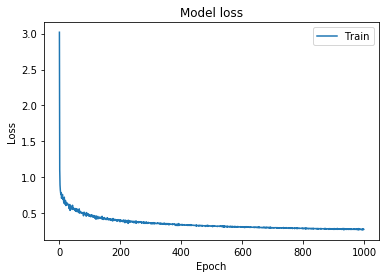

In [11]:
plt.plot(hist.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper right')
plt.show()

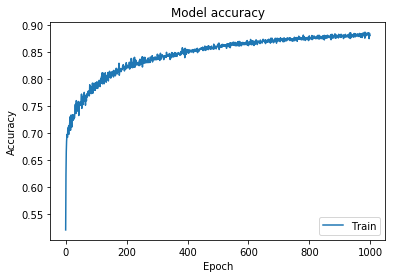

In [12]:
plt.plot(hist.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='lower right')
plt.show()